# Проект: Обучение с учителем: качество модели

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность, для этого:
- нужно промаркировать уровень финансовой активности постоянных покупателей: 
    - «снизилась», если клиент стал покупать меньше товаров; 
    - «прежний уровень».
- нужно собрать данные по клиентам по следующим группам:
    - признаки, которые описывают коммуникацию сотрудников компании с клиентом;
    - признаки, которые описывают продуктовое поведение покупателя;
    - признаки, которые описывают покупательское поведение клиента;
    - признаки, которые описывают поведение покупателя на сайте.
- нужно разработать модель, которая предскажет вероятность снижения покупательской активности.
- затем выделить сегменты покупателей и проанализировать их и предложить, как увеличить его покупательскую активность.

Описание данных:
- файл `market_file.csv` содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:
    - `id` — номер покупателя в корпоративной базе данных;
    - `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»;
    - `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт»;
    - `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель;
    - `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце;
    - `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте;
    - `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
    - `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев;
    - `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца;
    - `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца;
    - `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта;
    - `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;


- файл `market_money.csv` содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом:
    - `id` — номер покупателя в корпоративной базе данных;
    - `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц';
    - `Выручка` — сумма выручки за период;


- файл `market_time.csv` содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:
    - `id` — номер покупателя в корпоративной базе данных;
    - `Период` — название периода, во время которого зафиксировано общее время;
    - `минут` — значение времени, проведённого на сайте, в минутах;


- файл `money.csv` содержит данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю:
    - `id` — номер покупателя в корпоративной базе данных;
    - `Прибыль` — значение прибыли.
    
В проекте будет несколько блоков:
1. загрузка данных и изучение общей информации;
2. предобработка данных;
3. исследовательский анализ;
4. объединение данных;
5. корреляционный анализ;
6. выбор модели;
7. анализ важности признаков;
8. сегментация покупателей;
9. общий вывод.

## Загрузка данных и изучение общей информации

Для начала работы импортируем (установим) все необходимые в прокте библиотеки:

In [1]:
! pip install phik -q
! pip install scikit-learn --upgrade -q
! pip install shap -q

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import shap

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score, confusion_matrix



Загрузим все данные и посмотрим на них:

In [4]:
#Считываем данные и сохраняем в переменные: market_file, market_money, market_time и money
market_file = pd.read_csv('market_file.csv', sep=',')
market_money = pd.read_csv('market_money.csv', sep=',')
market_time = pd.read_csv('market_time.csv', sep=',')
money = pd.read_csv('money.csv', sep=';', decimal=',')

# выводим первые 5 строк каждого датафрейма
for i in market_file, market_money, market_time, money:
    display(i.head(6))

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   
5  215353                 Снизилась   стандартт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   
5    Домашний текстиль                                    4   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13
5  215350  предыдцщий_месяц      8

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21
5  215353     3.95

Данные считались корректно.

Посмотрим информацию о датафреймах с помощью метода `info()`:

In [5]:
for i in market_file, market_money, market_time, money:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

Радует что в данных нет пропусков.

Посмотрим на информацию о признаках в датафреймах с помощью метода `describe`

In [6]:
for i in market_file, market_money, market_time, money:
    display(i.drop('id', axis=1).describe(include='all'))

Покупательская активность Тип сервиса Разрешить сообщать  \
count                       1300        1300               1300   
unique                         2           3                  2   
top              Прежний уровень    стандарт                 да   
freq                         802         914                962   
mean                         NaN         NaN                NaN   
std                          NaN         NaN                NaN   
min                          NaN         NaN                NaN   
25%                          NaN         NaN                NaN   
50%                          NaN         NaN                NaN   
75%                          NaN         NaN                NaN   
max                          NaN         NaN                NaN   

        Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count          1300.000000           1300.000000   1300.000000   
unique                 NaN                   NaN           NaN   
top                    NaN                   NaN           NaN   
freq                   NaN                   NaN           NaN   
mean              4.253769              4.011538    601.898462   
std               1.014814              0.696868    249.856289   
min               0.900000              3.000000    110.000000   
25%               3.700000              4.000000    405.500000   
50%               4.200000              4.000000    606.000000   
75%               4.900000              4.000000    806.000000   
max               6.600000              5.000000   1079.000000   

        Акционные_покупки Популярная_категория  \
count         1300.000000                 1300   
unique                NaN                    6   
top                   NaN     Товары для детей   
freq                  NaN                  330   
mean             0.319808                  NaN   
std              0.249843                  NaN   
min              0.000000                  NaN   
25%              0.170000                  NaN   
50%              0.240000                  NaN   
75%              0.300000                  NaN   
max              0.990000                  NaN   

        Средний_просмотр_категорий_за_визит  \
count                            1300.00000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                                3.27000   
std                                 1.35535   
min                                 1.00000   
25%                                 2.00000   
50%                                 3.00000   
75%                                 4.00000   
max                                 6.00000   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                          1300.000000     1300.000000       1300.000000  
unique                                 NaN             NaN               NaN  
top                                    NaN             NaN               NaN  
freq                                   NaN             NaN               NaN  
mean                              2.840000        4.185385          8.176923  
std                               1.971451        1.955298          3.978126  
min                               0.000000        0.000000          1.000000  
25%                               1.000000        3.000000          5.000000  
50%                               3.000000        4.000000          8.000000  
75%                               4.000000        6.000000         11.000000  
max                              10.000000        9.000000         20.000000

Период        Выручка
count                  3900    3900.000000
unique                    3            NaN
top     препредыдущий_месяц            NaN
freq                   1300            NaN
mean                    NaN    5025.696051
std                     NaN    1777.704104
min                     NaN       0.000000
25%                     NaN    4590.150000
50%                     NaN    4957.500000
75%                     NaN    5363.000000
max                     NaN  106862.200000

Период        минут
count            2600  2600.000000
unique              2          NaN
top     текущий_месяц          NaN
freq             1300          NaN
mean              NaN    13.336154
std               NaN     4.080198
min               NaN     4.000000
25%               NaN    10.000000
50%               NaN    13.000000
75%               NaN    16.000000
max               NaN    23.000000

Прибыль
count  1300.000000
mean      3.996631
std       1.013722
min       0.860000
25%       3.300000
50%       4.045000
75%       4.670000
max       7.430000

### Вывод по блоку

Вывод по первому блоку:
- данные загружены корректно;
- пропусков в данных нет;
- можно переименовать столбцы змеиным регистром;
- количественные данные в разумных пределах, но максимальное значение выручки немного смущает (выброс?);
- `Выручка` и `Прибыль` имеют разную размерность;
- в колонке `Тип сервиса` есть какое-то лишнее третье значение;
- в `marke_time` есть орфографические ошибки.

##  Предобработка данных

###  Переименование столбцов

Для дальнейшего удобства написания кода приведем названия столбцов в удобный вид (английский язык и змеиный регистр):

In [7]:
# переименуем названия столбцов на названия на английском языке и со змеиным регистром во всех датафреймах
market_file.rename(columns = {'Покупательская активность':'customer_active',
                              'Тип сервиса':'type_service',
                              'Разрешить сообщать':'mailing',
                              'Маркет_актив_6_мес':'market_active_6_month',
                              'Маркет_актив_тек_мес':'market_active_current_month',
                              'Длительность':'duration',
                              'Акционные_покупки':'promotional_purchases',
                              'Популярная_категория':'popular_cat',
                              'Средний_просмотр_категорий_за_визит':'mean_view_cat_visit',
                              'Неоплаченные_продукты_штук_квартал':'unpaid_product',
                              'Ошибка_сервиса':'service_error',
                              'Страниц_за_визит':'page_visit'
                             }, inplace = True
                 )

market_money.rename(columns = {'Период':'period',
                               'Выручка':'revenue'
                              }, inplace = True
                 )

market_time.rename(columns = {'Период':'period',
                              'минут':'minutes'
                             }, inplace = True
                 )

money.rename(columns = {'Прибыль':'income'}, inplace = True)

###  Проверка на наличие явных и неявных дубликатов

Посмотрим посмотрим на уникальные значения категориальных данных в датафреймах:

In [8]:
# перебираем уникальные значения столбцов с типом object всех датафреймов 
for i in market_file, market_money, market_time, money:
    for col in i.select_dtypes('object'):
        print(f'Уникальные значения столбца "{col}": {i[col].unique()} \n')

Уникальные значения столбца "customer_active": ['Снизилась' 'Прежний уровень'] 

Уникальные значения столбца "type_service": ['премиум' 'стандартт' 'стандарт'] 

Уникальные значения столбца "mailing": ['да' 'нет'] 

Уникальные значения столбца "popular_cat": ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника'] 

Уникальные значения столбца "period": ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц'] 

Уникальные значения столбца "period": ['текущий_месяц' 'предыдцщий_месяц'] 



Видно, что:
- в столбце `type_service` есть ошибочное написание `стандартт`;
- в столбце `popular_cat` есть орфографическая ошибка `Косметика и аксесуары` вместо `Косметика и аксесcуары`;
- в столбце `period` датафрейма `market_money` орфографическая ошибка `препредыдущий_месяц` вместо `предпредыдущий_месяц`;
- в столбце `period` датафрейма `market_time` орфографическая ошибка `предыдцщий_месяц` вместо `предыдущий_месяц`.

Последние три ошибки ни на что не повлияют, но для успокоения их тоже заменим:

In [9]:
# замена неявных дубликатов в market_file
market_file['type_service'] = market_file['type_service'].replace('стандартт', 'стандарт')
market_file['popular_cat'] = market_file['popular_cat'].replace('Косметика и аксесуары', 'Косметика и аксеcсуары')

# замена неявных дубликатов в market_money
market_money['period'] = market_money['period'].replace('препредыдущий_месяц', 'предпредыдущий_месяц')

# замена неявных дубликатов в market_time
market_time['period'] = market_time['period'].replace('предыдцщий_месяц', 'предыдущий_месяц')

Теперь проверим на налчие явных дубликатов:

In [10]:
print('Количество явных дубликатов market_file:', market_file.duplicated().sum())
print('Количество явных дубликатов market_money:', market_money.duplicated().sum())
print('Количество явных дубликатов market_time:', market_time.duplicated().sum())
print('Количество явных дубликатов money:', money.duplicated().sum())

Количество явных дубликатов market_file: 0
Количество явных дубликатов market_money: 0
Количество явных дубликатов market_time: 0
Количество явных дубликатов money: 0


Дубликатов нет!

### Вывод по блоку

Выводы по предобработке данных:
- переименованы названия столбцов;
- заменены некорректные записи (ошибки в написании) категориальных данных;
- данные прошли проверку на дубликаты.

## Исследовательский анализ данных

### Исследовательский анализ количественных данных

Построим гистограммы и "ящики с усами" для количественных признаков, предварительно создав функцию для их построения:

In [11]:
# создадим функцию для построения гистограммы и ящика с усами для количетсвенных признаков
def hist_and_boxplot_num_col (df, parametr, type_plot):
    # вывод числового описания данных
    print(df[parametr].describe())
    
    # выбор количества корзин
    if ((len(df[parametr].unique())) >= 20):
        bins = 20
    else:
        bins = len(df[parametr].unique())
        
    fig, axes = plt.subplots(1, 2, figsize=(18, 9))
    plt.suptitle(f'Распределение признака {parametr}', fontsize=20)
    
    # построение гистограммы
    if type_plot == 'hist':
        df[parametr].hist(bins=20, grid=True, ax=axes[0])
        axes[0].set_ylabel('Количество', fontsize=15)
        axes[0].set_xlabel(f'Значение {parametr}', fontsize=15)
    # или столбчатого графика
    elif type_plot == 'bar':
        df.groupby(by=parametr)[parametr].count().plot.bar(grid=True, ax=axes[0])
        axes[0].set_ylabel('Количество', fontsize=15)
        axes[0].set_xlabel(f'Значение {parametr}', fontsize=15)
    else:
        print('Неизвестный тип графика')
        
    # построение ящика с усами
    df.boxplot(column=parametr, ax=axes[1])
    axes[1].set_ylabel(f'Значение {parametr}', fontsize=15)
    
    plt.show()

Посмотрим как распределено среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев:

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: market_active_6_month, dtype: float64


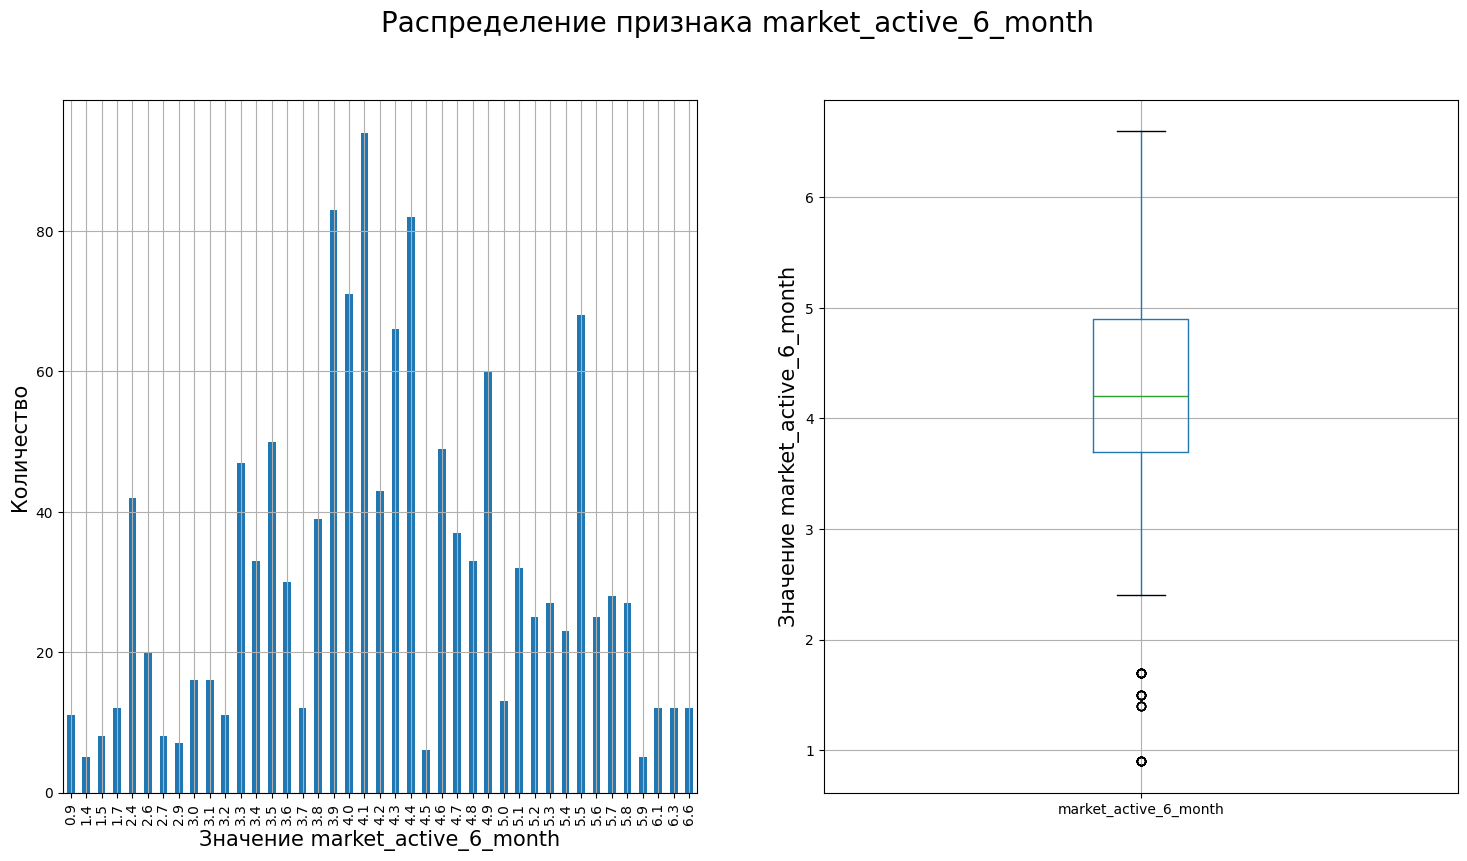

In [12]:
hist_and_boxplot_num_col(market_file, 'market_active_6_month', 'bar')

Видно, что:
- в среднем в месяц на клиента приходится около 4  маркетинговых коммуникаций;
- распределение не похоже на нормальное.

Посмотрим на распределение количества маркетинговых коммуникаций в текущем месяце:

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: market_active_current_month, dtype: float64


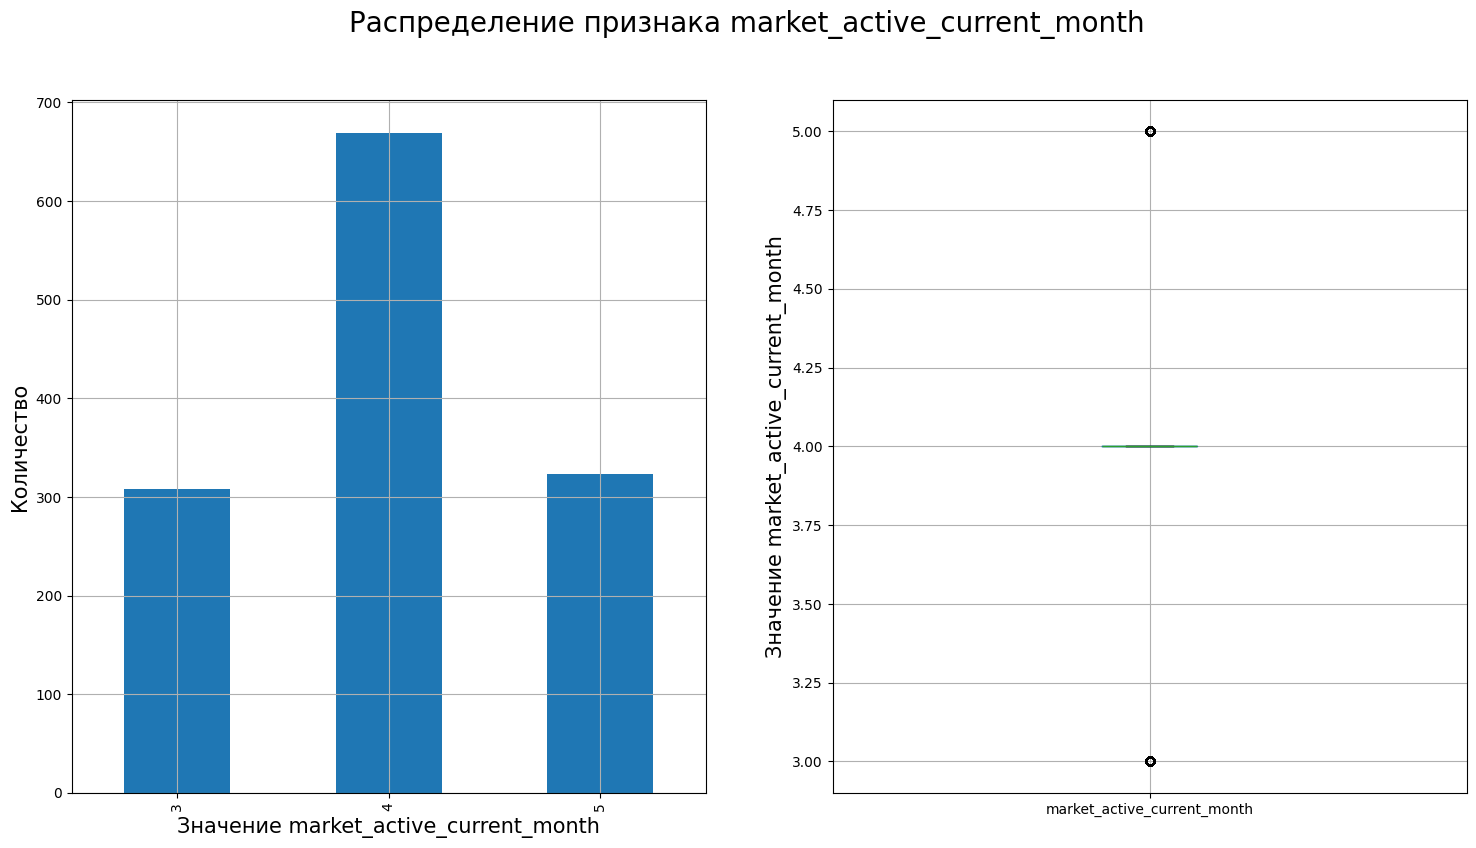

In [13]:
hist_and_boxplot_num_col(market_file, 'market_active_current_month', 'bar')

Видно, что:
- в текущем месяце, как и за последние пол года в среднем на клиента приходится по 4 маркетинговой коммуникации;
- в текущем месяце было только от 3 до 5 маркетинговых коммуникаций, за прошедшие пол года разброс значений был побольше;
- распределение похоже на нормальное.

Посмотрим на распределение дней, прошедших с момента регистрации покупателя на сайте:

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: duration, dtype: float64


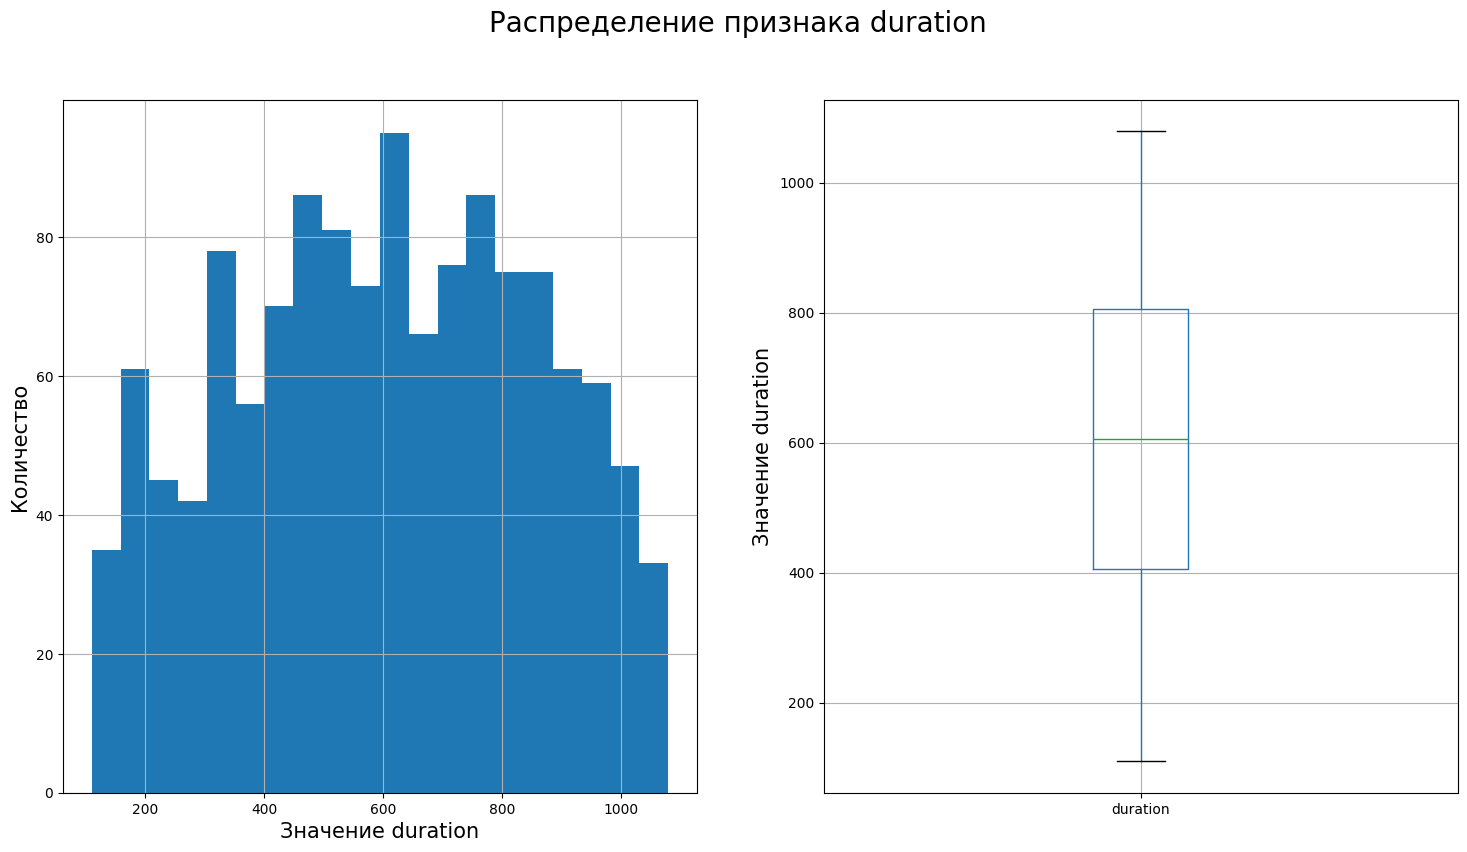

In [14]:
hist_and_boxplot_num_col(market_file, 'duration', 'hist')

Видно, что:
- в даасете нет покупателей, которые зарегистрировались бы раньше чем 3,5 месяца назад;
- пики регистраций были от 400 до 800 дней назад;
- распределение нельзя назвать нормальным, из-за множества пиков (возможно там были какие-то акции, которые привлекали много новых клиентов).

Посмотрим на распределение среднемесячной доля покупок по акции от общего числа покупок за последние 6 месяцев

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: promotional_purchases, dtype: float64


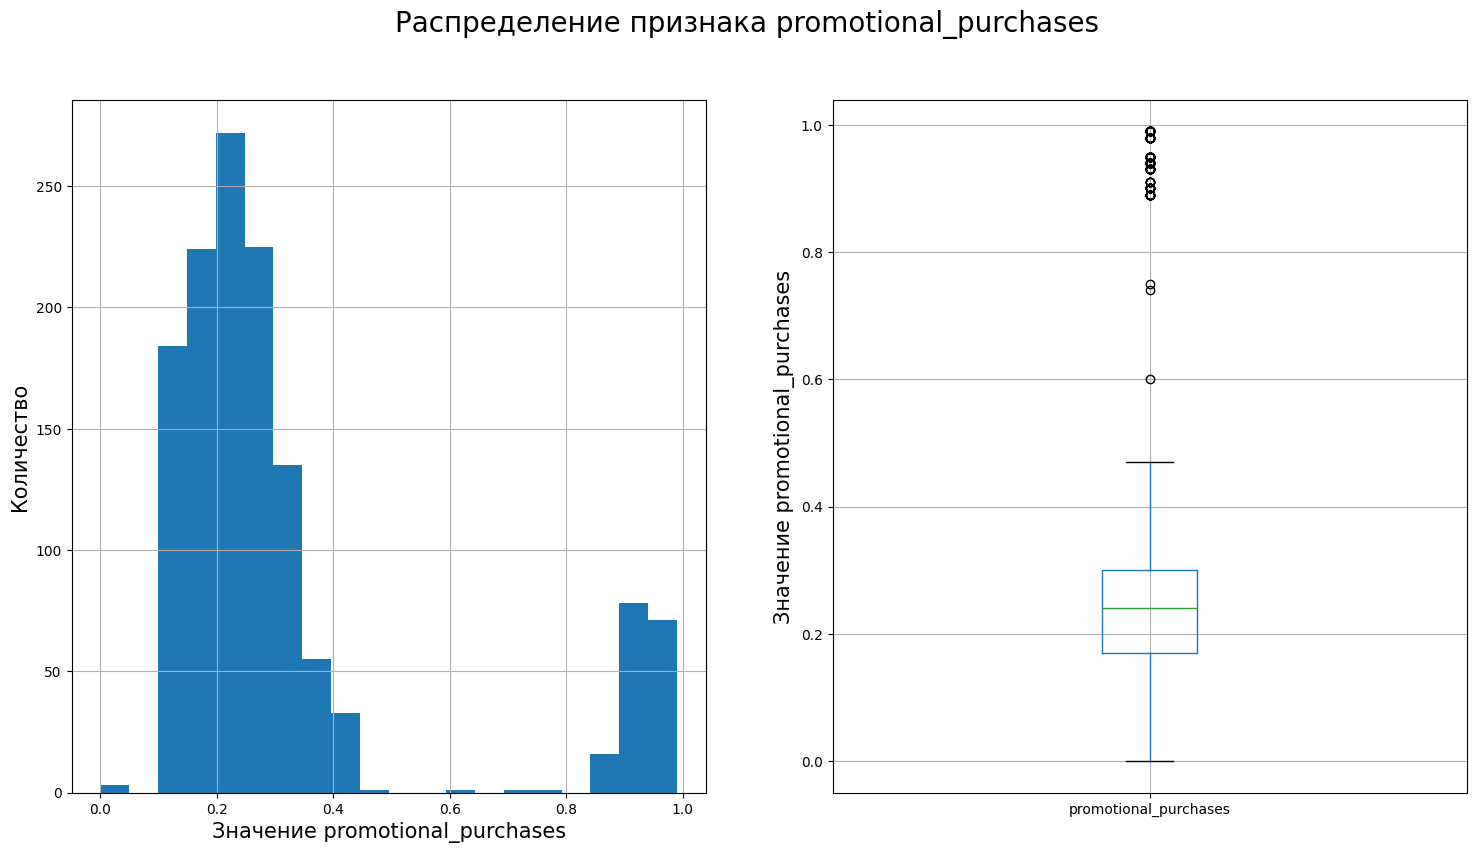

In [15]:
hist_and_boxplot_num_col(market_file, 'promotional_purchases', 'hist')

Видно, что:
- есть часть покупателей, которые в основном покупают акционные товары (доля покупок более 0,8);
- у большинства покупателей доля покупок по акции меньше 0,4;
- распределение не похоже на нормальное, так как есть две противоположных категории.

Посмотрим на распределение среднего количества просматриваемых категорий покупателем за визит в течение последнего месяца:

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: mean_view_cat_visit, dtype: float64


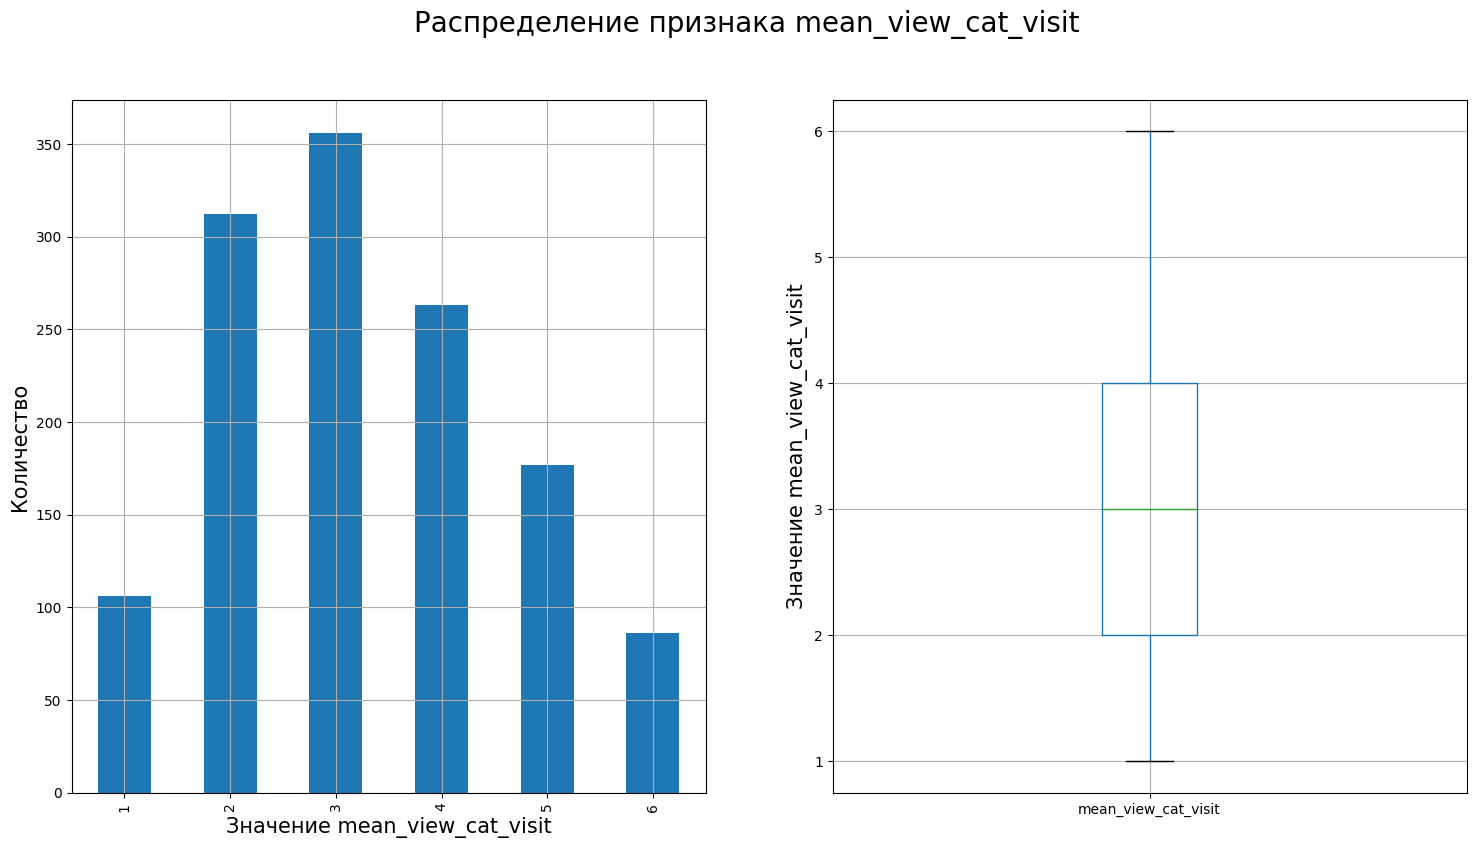

In [16]:
hist_and_boxplot_num_col(market_file, 'mean_view_cat_visit', 'bar')

Видно, что:
- в среднем покупатели просматривали около 3 категорий в течении последнего месяца;
- распределение немного похоже на нормальное.

Посмотрим на распределение общего числа неоплаченных товаров в корзине за последние 3 месяца:

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: unpaid_product, dtype: float64


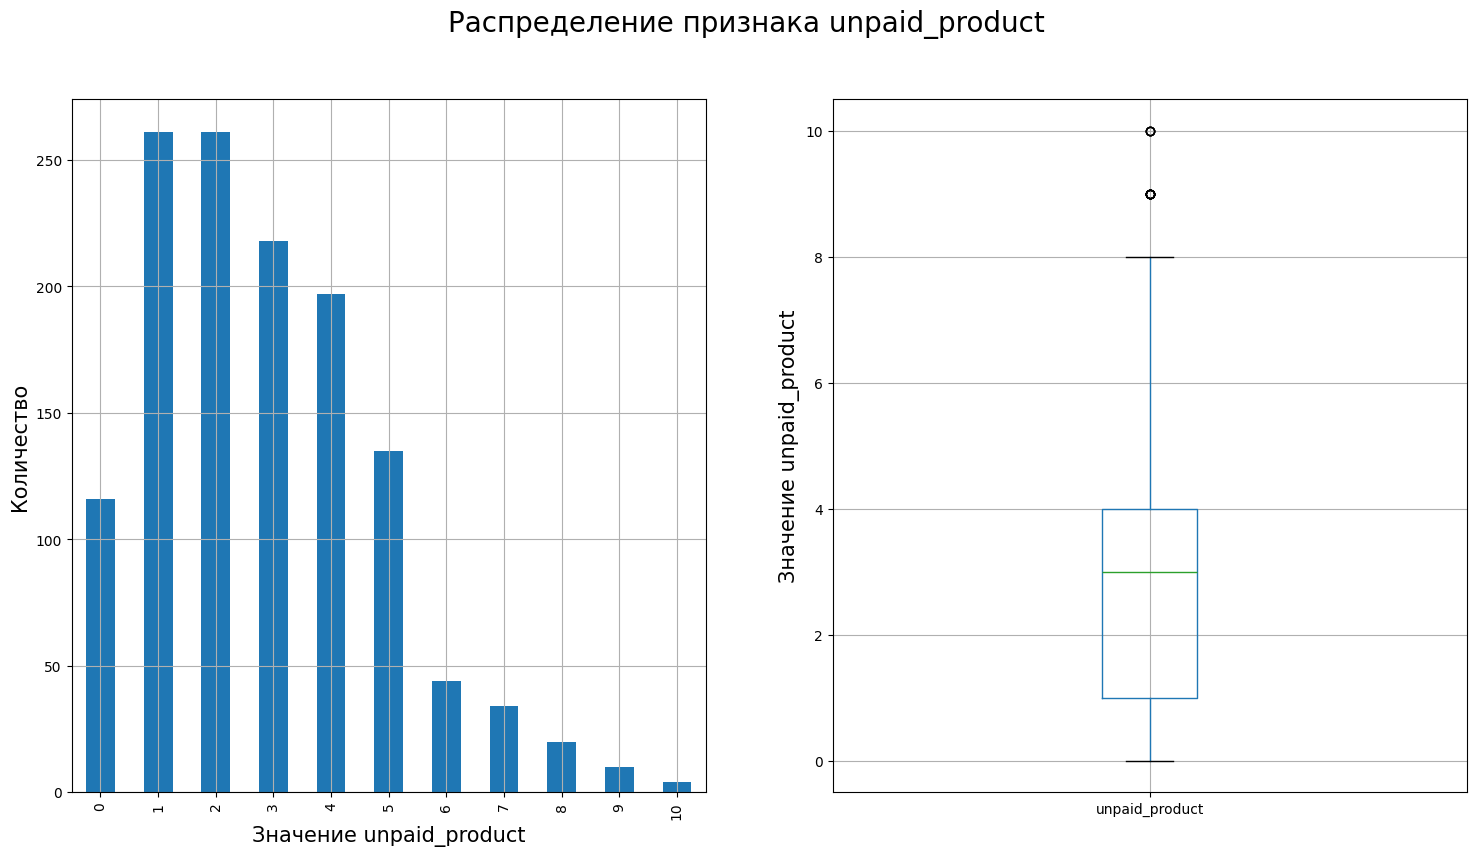

In [17]:
hist_and_boxplot_num_col(market_file, 'unpaid_product', 'bar')

Видно, что:
- у большей части покупателей в корзине лежало от 1 до 5 неоплаченных товаров в корзине;
- распределение не похоже на нормальное.

Посмотрим на распределение числа сбоев, которые коснулись покупателя во время посещения сайта:

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: service_error, dtype: float64


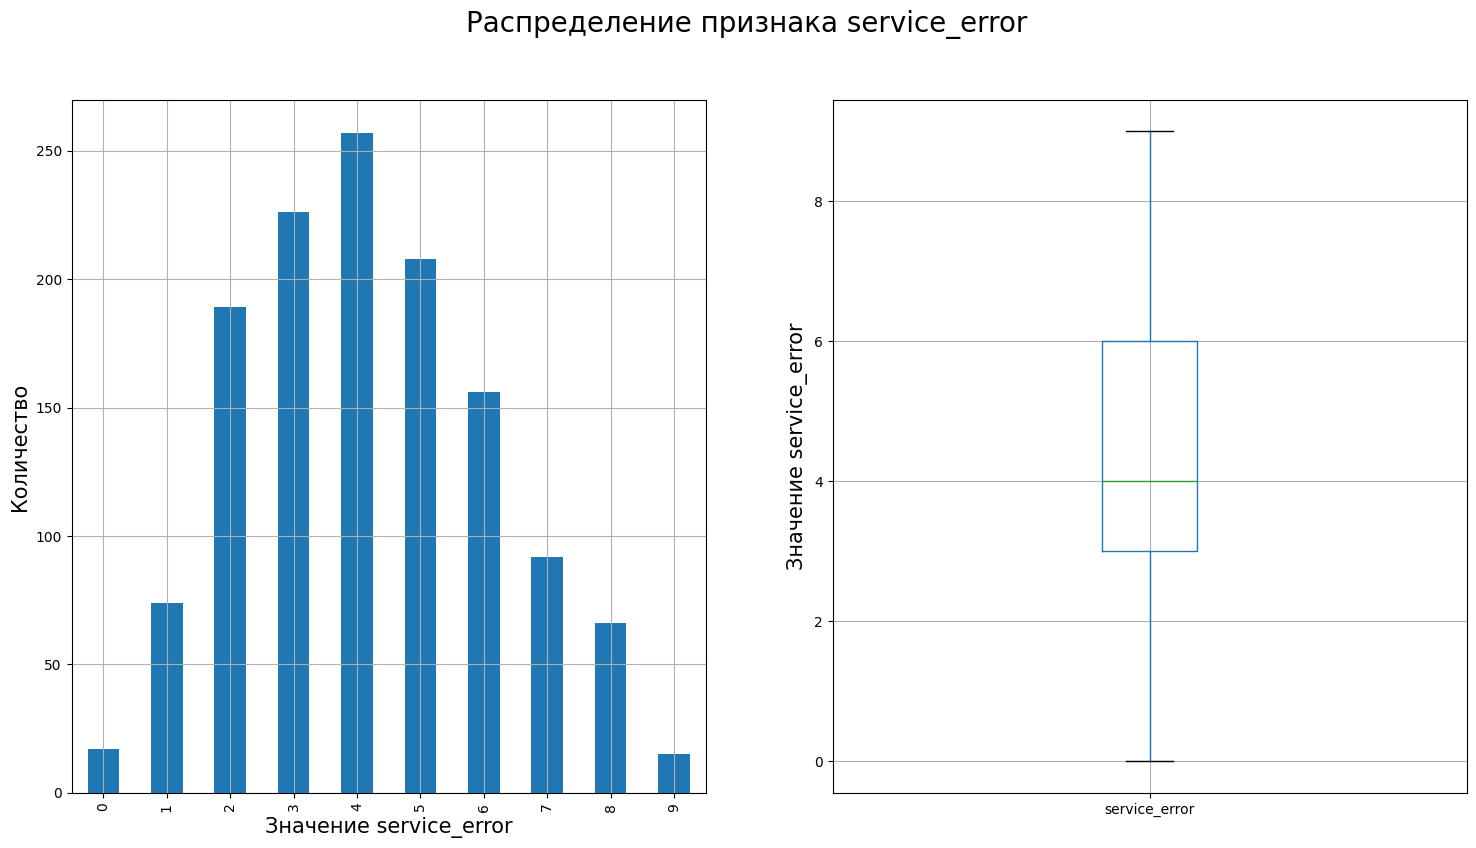

In [18]:
hist_and_boxplot_num_col(market_file, 'service_error', 'bar')

Видно, что:
- в среднем число сбоев с которыми сталкивался покупатель равно 4;
- распределение похоже на нормальное.

Посмотрим на распределение среднего количества страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца:

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: page_visit, dtype: float64


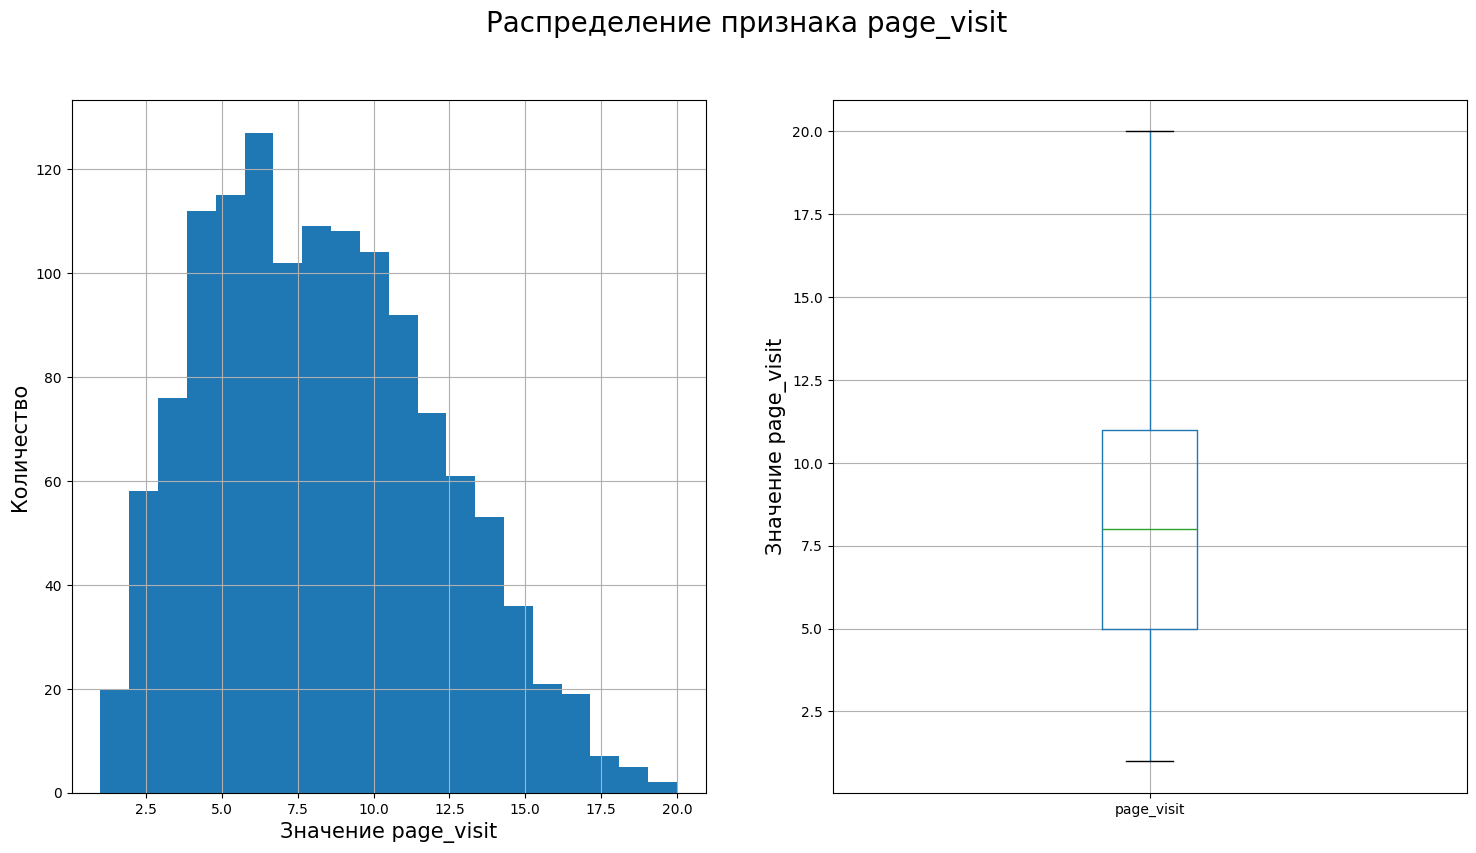

In [19]:
hist_and_boxplot_num_col(market_file, 'page_visit', 'hist')

Видно, что
- в среднем покупатель просматривал 8 страниц за один визит на сайт;
- рааспределение немного похоже на нормальное.

Посмотрим на распределение суммы выручки:

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: revenue, dtype: float64


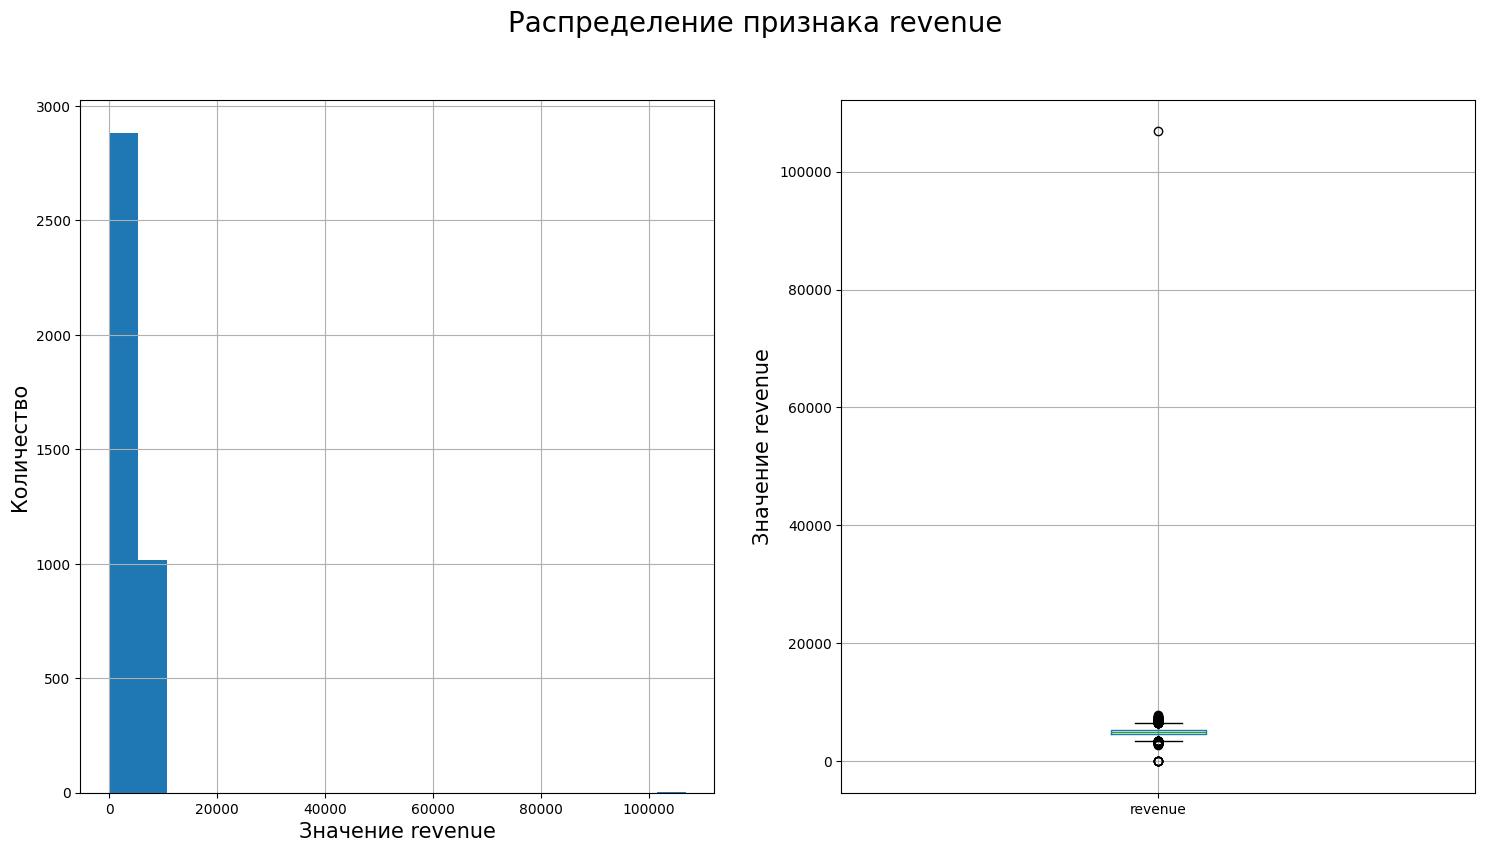

In [20]:
hist_and_boxplot_num_col(market_money, 'revenue', 'hist')

Вот и выброс, но возможно покупатель и реально купил на столько, попробуем отбросить этот выброс и посмотрим на распределение без него:

count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: revenue, dtype: float64


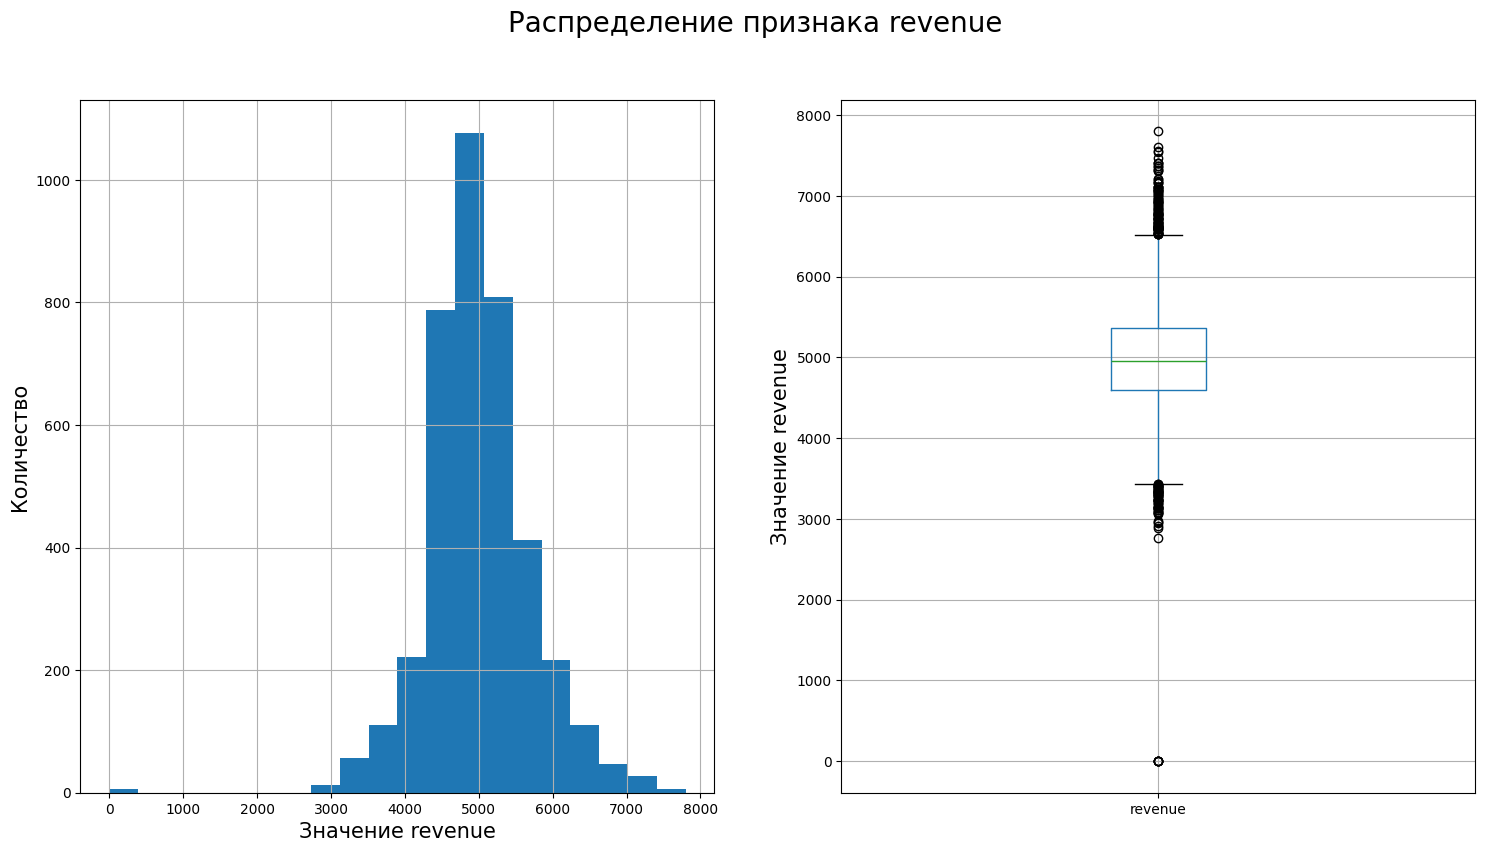

In [21]:
hist_and_boxplot_num_col(market_money.query('revenue < 20000'), 'revenue', 'hist')

Так лучше! Видно, что:
- в среднем покупатель приносит 5000 рублей выручки сайту;
- есть покупатели, которые не принесли выручку в какой-то месяц (уберем их при объединении таблиц);
- распределение похоже на нормальное.

Посмотрим на распределение времени, проведенного на сайте:

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: minutes, dtype: float64


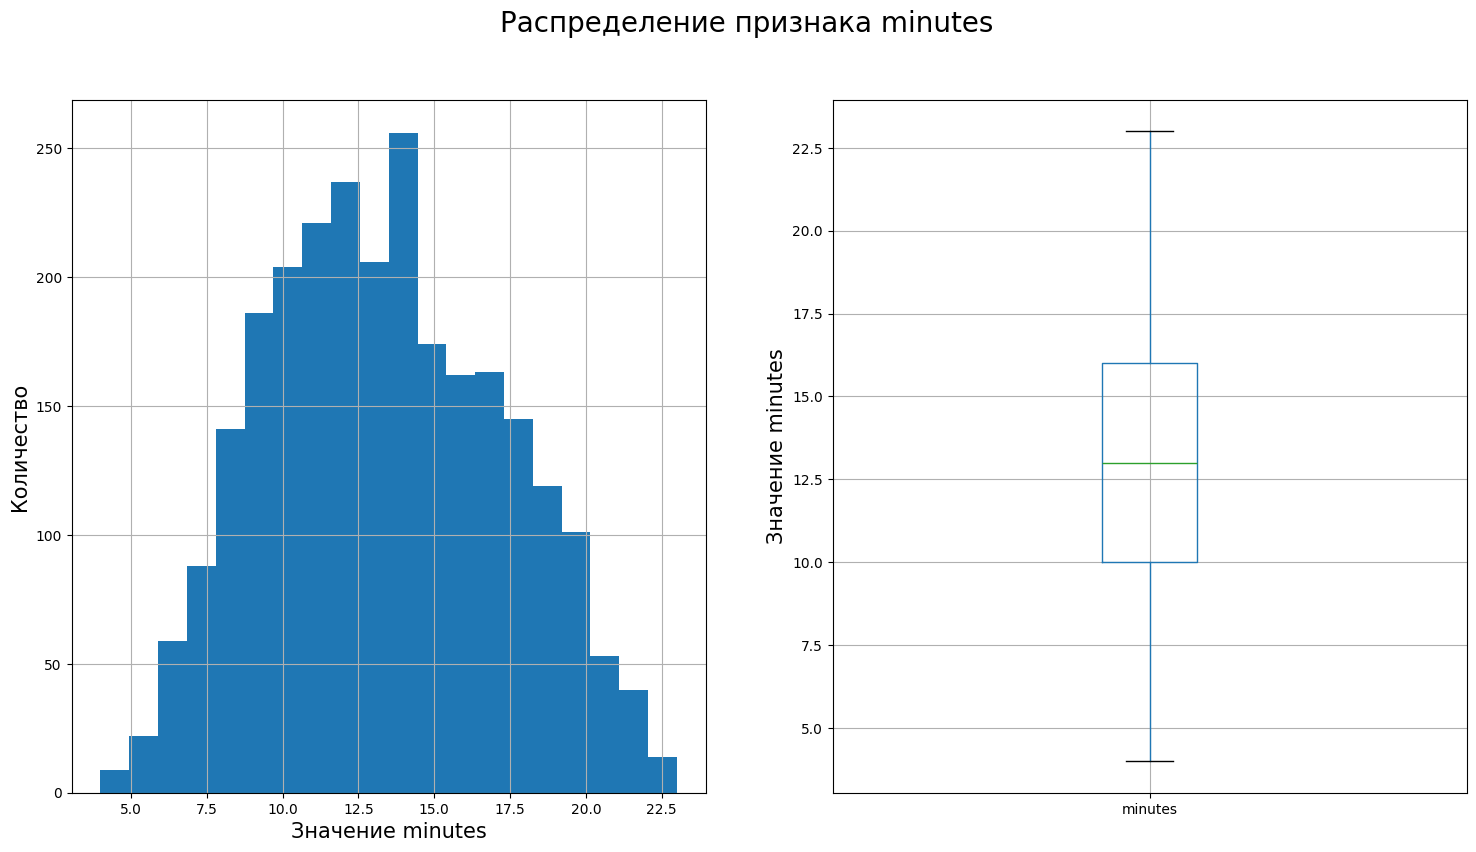

In [22]:
hist_and_boxplot_num_col(market_time, 'minutes', 'hist')

Видно, что:
- в среднем покупатель находится на сайте 13 минут;
- распределение похоже на нормальное.

Посмотрим на распределение среднемесячной прибыли от покупателей:

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: income, dtype: float64


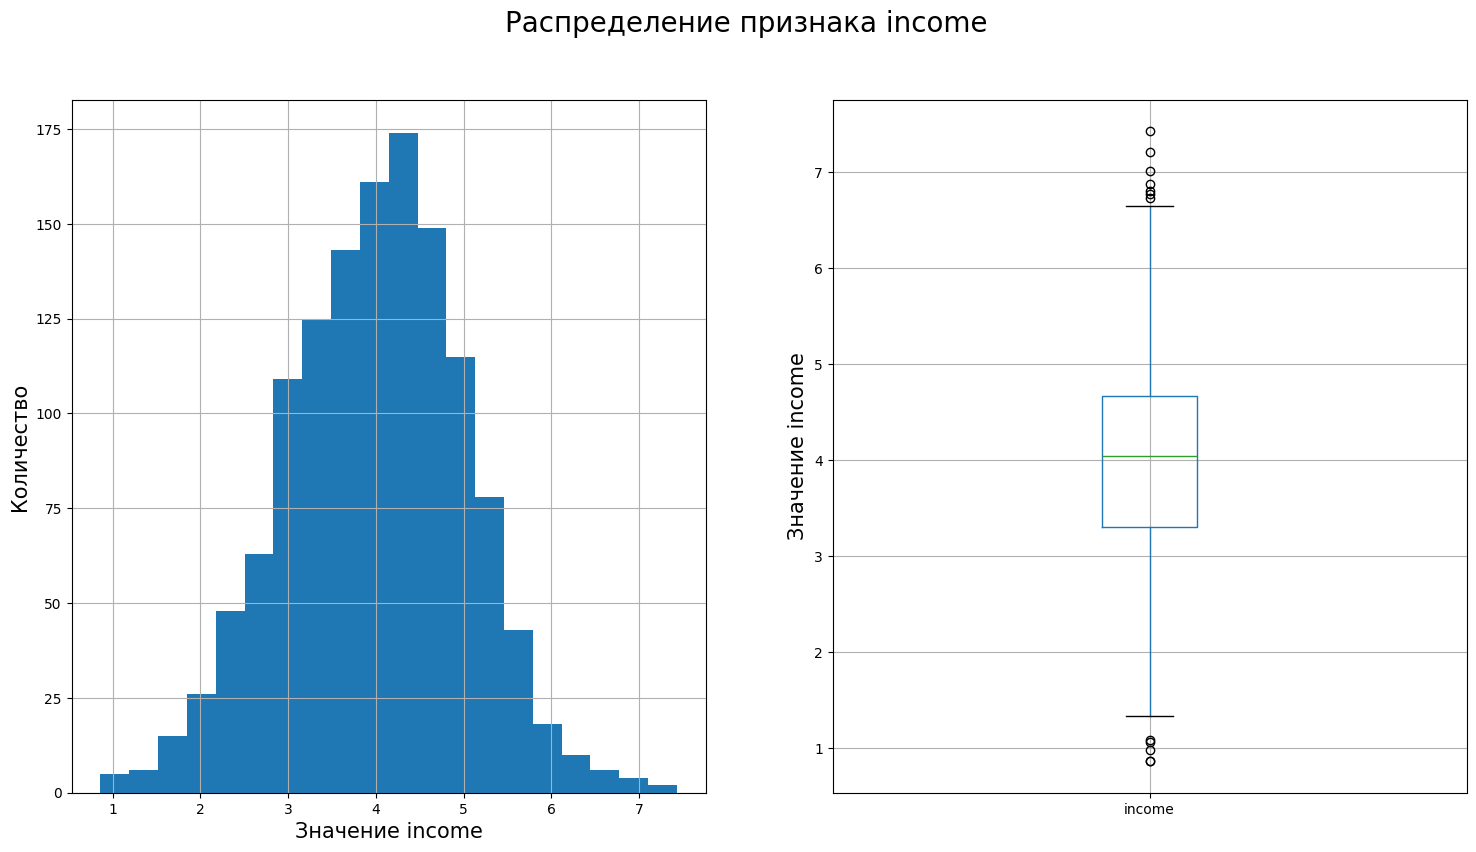

In [23]:
hist_and_boxplot_num_col(money, 'income', 'hist')

Видно, что:
- нет выбросов, хотя один должен был быть, ведь была прибыль с одного покупателя свыше 100000, значит можно сделать вывод, что в прибыли было ошибочное значение;
- значения в 1000 раз меньше, чем значения прибыли, скорее всего разная размерность;
- распределение похоже на нормальное.

### Исследовательский анализ категориальных данных

Сначала также создадим функцию, которая будет строить графики для категориальных переменных:

In [24]:
# создадим функцию для постройки столбчатого графика для категориальных признаков
def barplot_cat_col (df, parametr):
    df = df.groupby(by=parametr)[parametr].count()
    
    # построение барплота
    df.plot.bar(
        figsize=(9, 9), # размер графика
        grid=True, # сетка
        rot=30
    )
    plt.ylabel('Количество покупателей', fontsize=15)
    plt.xlabel(f'Признак: {parametr}', fontsize=15)
    plt.title(f'Распределение покупателей по признаку: {parametr}', fontsize=20)
    plt.show()

Готово, посмотрим на распределение покупательской активности (целевого признака):

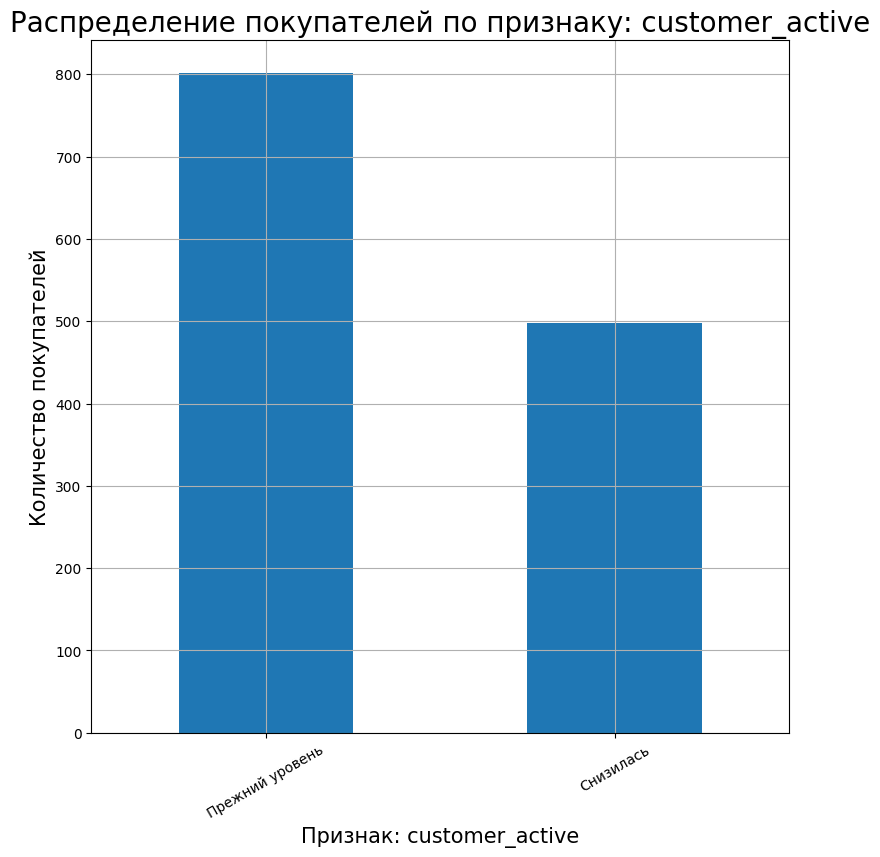

In [25]:
barplot_cat_col(market_file, 'customer_active')

Видно, что покупателей с прежним уровнем покупательской активности на 300 больше, а это целевой признак, значит при разделении на выборки необходимо будет стратифицировать данные.

Псомотрим на распределение уровеня сервиса:

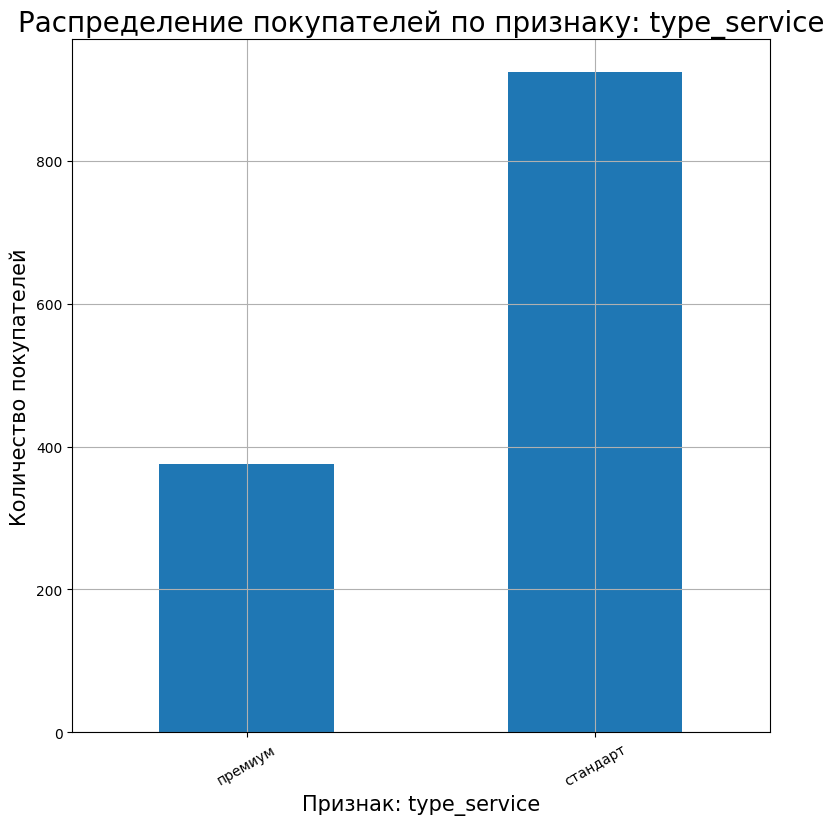

In [26]:
barplot_cat_col(market_file, 'type_service')

Видно, что покупателей стандартным уровнем сервиса больше чем в два раза, чем покупателей с сервисом `премиум`.

Посмотрим на распределение информации о том, можно ли присылать покупателю дополнительные предложения о товаре:

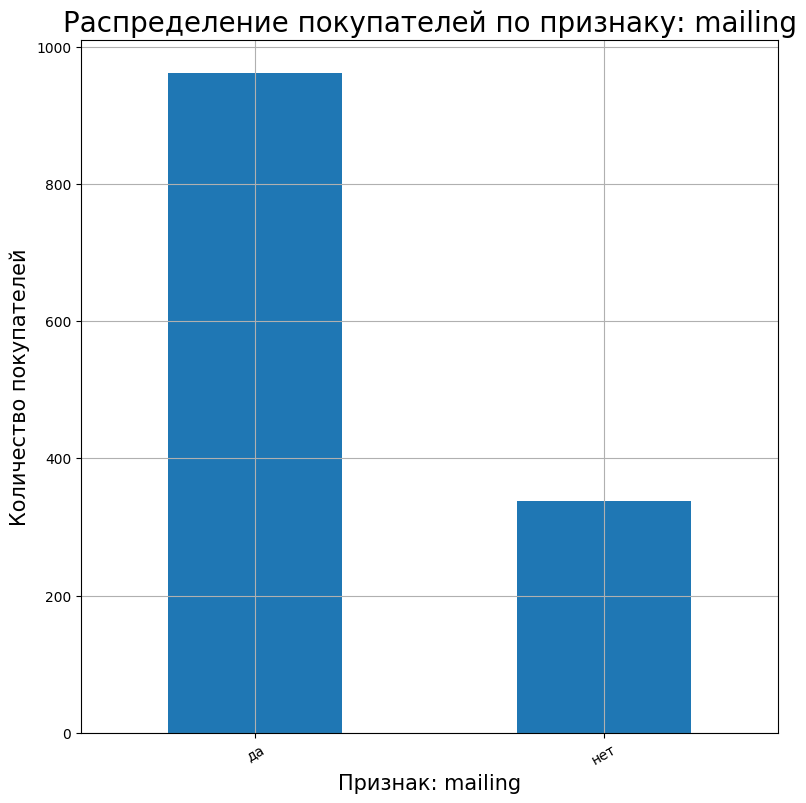

In [27]:
barplot_cat_col(market_file, 'mailing')

Видно, что согласных на рассылку дополнительных предложений о товарах почти в три раза больше не согласных.

Посмотрим на распределение популярных категорий:

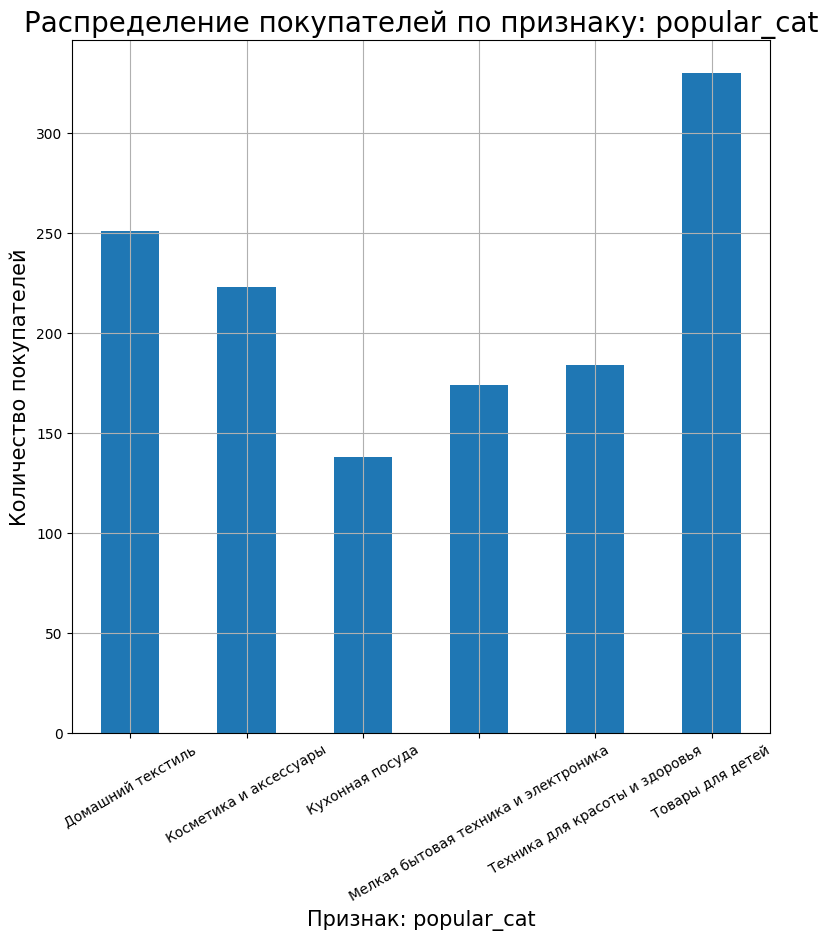

In [28]:
barplot_cat_col(market_file, 'popular_cat')

Видно, что:
- в основном за последние пол года покупатели приобретают товары из категории `Товары для детей`;
- дальше идут товары из категорий `Домашний текстиль` и `Косметика и аксессуары`;
- всех меньше покупают `Технику для красоты и здоровья`, `Мелкую бытовую технику и электронику` и самая непопулярная категория `Кухонная посуда`.

И в конце посмотрим за какие периоды данные в `market_money` и `market_time`:

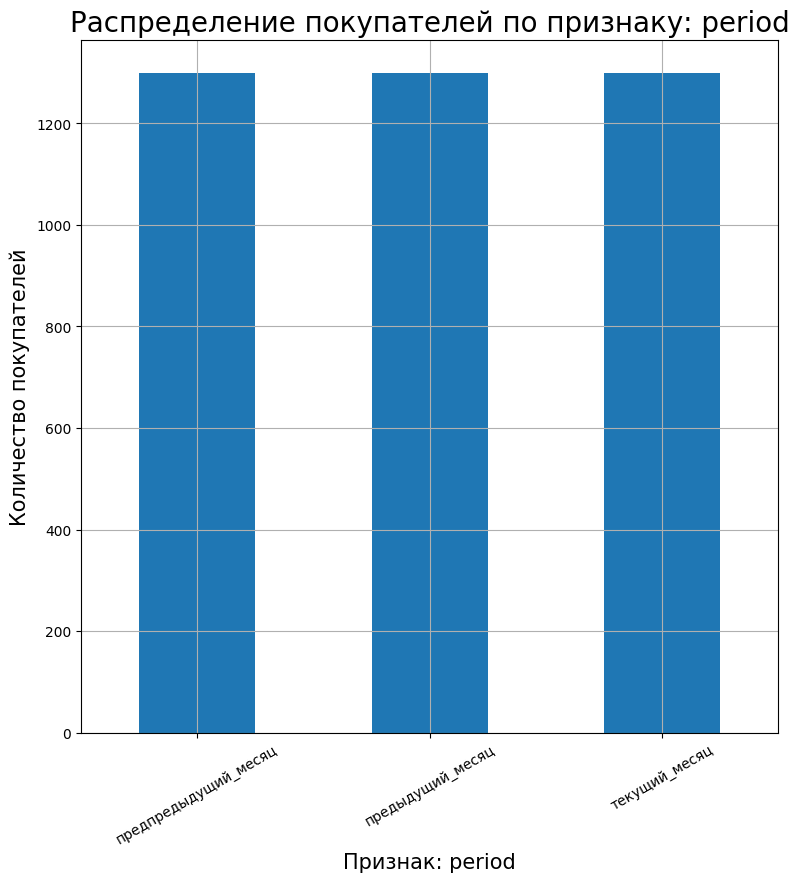

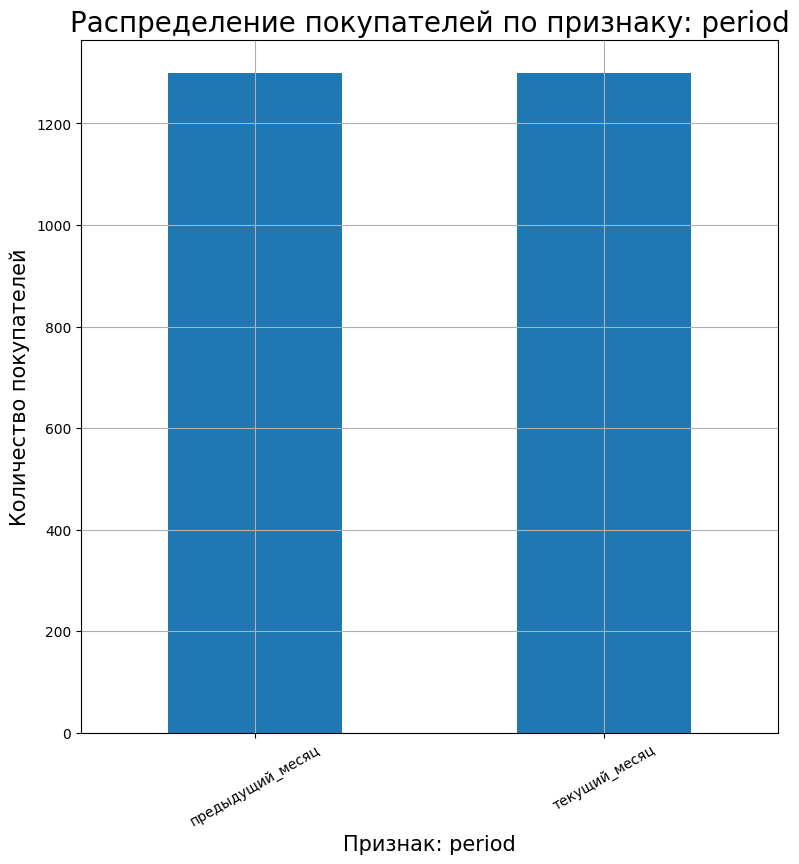

In [29]:
barplot_cat_col(market_money, 'period')
barplot_cat_col(market_time, 'period')

Видно, что:
- в `market_money` данные за последние 3 месяца;
- в `market_time` данные за последние два месяца.

### Вывод по блоку

Вывод по исследовательскому анализу:
- в данных о выручке в `market_money` есть выброс от которого нужно избавиться;
- данные о прибыли, времени, проведенного на сайте, среджнего количества страниц, просмотренных на сайте, чмсло сбоев во время посешения сайта и среднее количество категорий, просмотренных покупателем за визит сайта распределены нормально;
- есть дисбаланс целевого признака;
- самая популярная категория: `товары для детей`

## Объединение таблиц

### Объединение таблиц в один датафрейм

Для дальнейшего анализа и построения модели, необходимо объединить датафреймы `market_file`, `market_money` и `market_time`, создадим функцию, которая будет добавлять новый столбец с учетом того, что в датафреймах `market_money` и `market_time` данные за разные периоды:

In [30]:
def merge_new (df, df_2, period, old_name, new_name):
    # добавление данных по выручке за предпредыдущий месяц
    df = df.merge(df_2.query('period == @period').drop('period', axis=1),
                  on='id',
                  how='left'
                 )
    
    # переименование нового столбца
    df.rename(columns = {old_name: new_name}, inplace = True)
    return df

In [31]:
# добавление времени, проведенного на сайте, за предыдущий месяц
market_file = merge_new(market_file, market_time, 'предыдущий_месяц', 'minutes', 'minutes_previous')

# добавление времени, проведенного на сайте, за текущий месяц
market_file = merge_new(market_file, market_time, 'текущий_месяц', 'minutes', 'minutes_current')

# добавление выручки за предпредыдущий месяц (убрав выброс и отсекая нулевую выручку)
market_file = merge_new(market_file, 
                        market_money.query('1000 < revenue < 20000'), 
                        'предпредыдущий_месяц', 
                        'revenue', 
                        'revenue_pre_existing'
                       )

# добавление выручки за предыдущий месяц
market_file = merge_new(market_file, 
                        market_money.query('1000 < revenue < 20000'), 
                        'предыдущий_месяц', 
                        'revenue', 
                        'revenue_previous'
                       )

# добавление выручки за текущий месяц
market_file = merge_new(market_file, 
                        market_money.query('1000 < revenue < 20000'), 
                        'текущий_месяц', 
                        'revenue', 
                        'revenue_current'
                       )

# информация о датафрейме market_file
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1300 non-null   int64  
 1   customer_active              1300 non-null   object 
 2   type_service                 1300 non-null   object 
 3   mailing                      1300 non-null   object 
 4   market_active_6_month        1300 non-null   float64
 5   market_active_current_month  1300 non-null   int64  
 6   duration                     1300 non-null   int64  
 7   promotional_purchases        1300 non-null   float64
 8   popular_cat                  1300 non-null   object 
 9   mean_view_cat_visit          1300 non-null   int64  
 10  unpaid_product               1300 non-null   int64  
 11  service_error                1300 non-null   int64  
 12  page_visit                   1300 non-null   int64  
 13  minutes_previous  

Есть пропуски, но обработаем их позже.

Теперь расчитаем разницу в выручке предыдущего и предпредыдущего месяца `difference_revenue_pre_existing` и разницу выручке предыдущего и текущего месяца `difference_revenue_previous` и удалим данны с выручной за предыдущий и предпредыдущий месяц:

In [32]:
# добавление столбца difference_revenue_pre_existing
market_file['difference_revenue_pre_existing'] = market_file['revenue_previous'] - market_file['revenue_pre_existing']

# добавление столбца difference_revenue_previous
market_file['difference_revenue_previous'] = market_file['revenue_current'] - market_file['revenue_previous']

# удаление столбцов revenue_pre_existing и revenue_previous
market_file = market_file.drop(['revenue_pre_existing', 'revenue_previous'], axis=1)

Посмотрим на информацию о новых признаках:

In [33]:
# проверка на наличие пропусков
for i in ('minutes_previous', 'minutes_current', 'revenue_current', 'difference_revenue_pre_existing', 'difference_revenue_previous'):
    print(f'Количество пропусков в {i}: {market_file[i].isna().sum()}')

Количество пропусков в minutes_previous: 0
Количество пропусков в minutes_current: 0
Количество пропусков в revenue_current: 1
Количество пропусков в difference_revenue_pre_existing: 3
Количество пропусков в difference_revenue_previous: 4


В столбцах `revenue_current` и `difference_revenue_previous` и `difference_revenue_pre_existing` появились пропуски (из-за отброса выброса и нулевой выручки), удалим эти строки, т.к. нужно отобрать покупателей у которых за последние три месяца была какая-либо активность:

In [34]:
# заполнение пропусков медианным значением
for i in ('revenue_current', 'difference_revenue_previous', 'difference_revenue_pre_existing'):
    market_file.dropna(subset=[i], inplace=True)

# сбрасываем индексы
market_file.reset_index(drop=True)

# проверка на наличие пропусков
for i in ('revenue_current', 'difference_revenue_previous', 'difference_revenue_pre_existing'):
    print(f'Количество пропусков в {i}: {market_file[i].isna().sum()}')
    
print(f'\nРазмер объединенного датафрейма market_file: {market_file.shape}')

Количество пропусков в revenue_current: 0
Количество пропусков в difference_revenue_previous: 0
Количество пропусков в difference_revenue_pre_existing: 0

Размер объединенного датафрейма market_file: (1296, 18)


Пропусков больше нет, датафрейм увеличился на 5 новых признаков и сократился на 4 строки, где не было покупательской активности.

### Вывод по блоку

Вывод по объединению данных:
- с помощью функции были добавлены новые столбцы с выручкой и временем на сайте;
- с помощью этих столбцов были получены признаки, описывающие финансовое поведение покупателей;
- убраны покупатели у которых не было активности за какой-либо месяц за последний квартал.

## Корреляционный анализ данных

### Корреляционный анализ признаков

Для нахождения зависимостей признаков воспользуемся коэффициентом Фи (признаки: `market_active_current_month`, `mean_view_cat_visit`, `unpaid_product`, `service_error`, `page_visit` больше похожи на категориальные признаки (мало уникальных значений) не будем их указывать в параметре `interval_cols`, где отобразим непрерывные признаки):

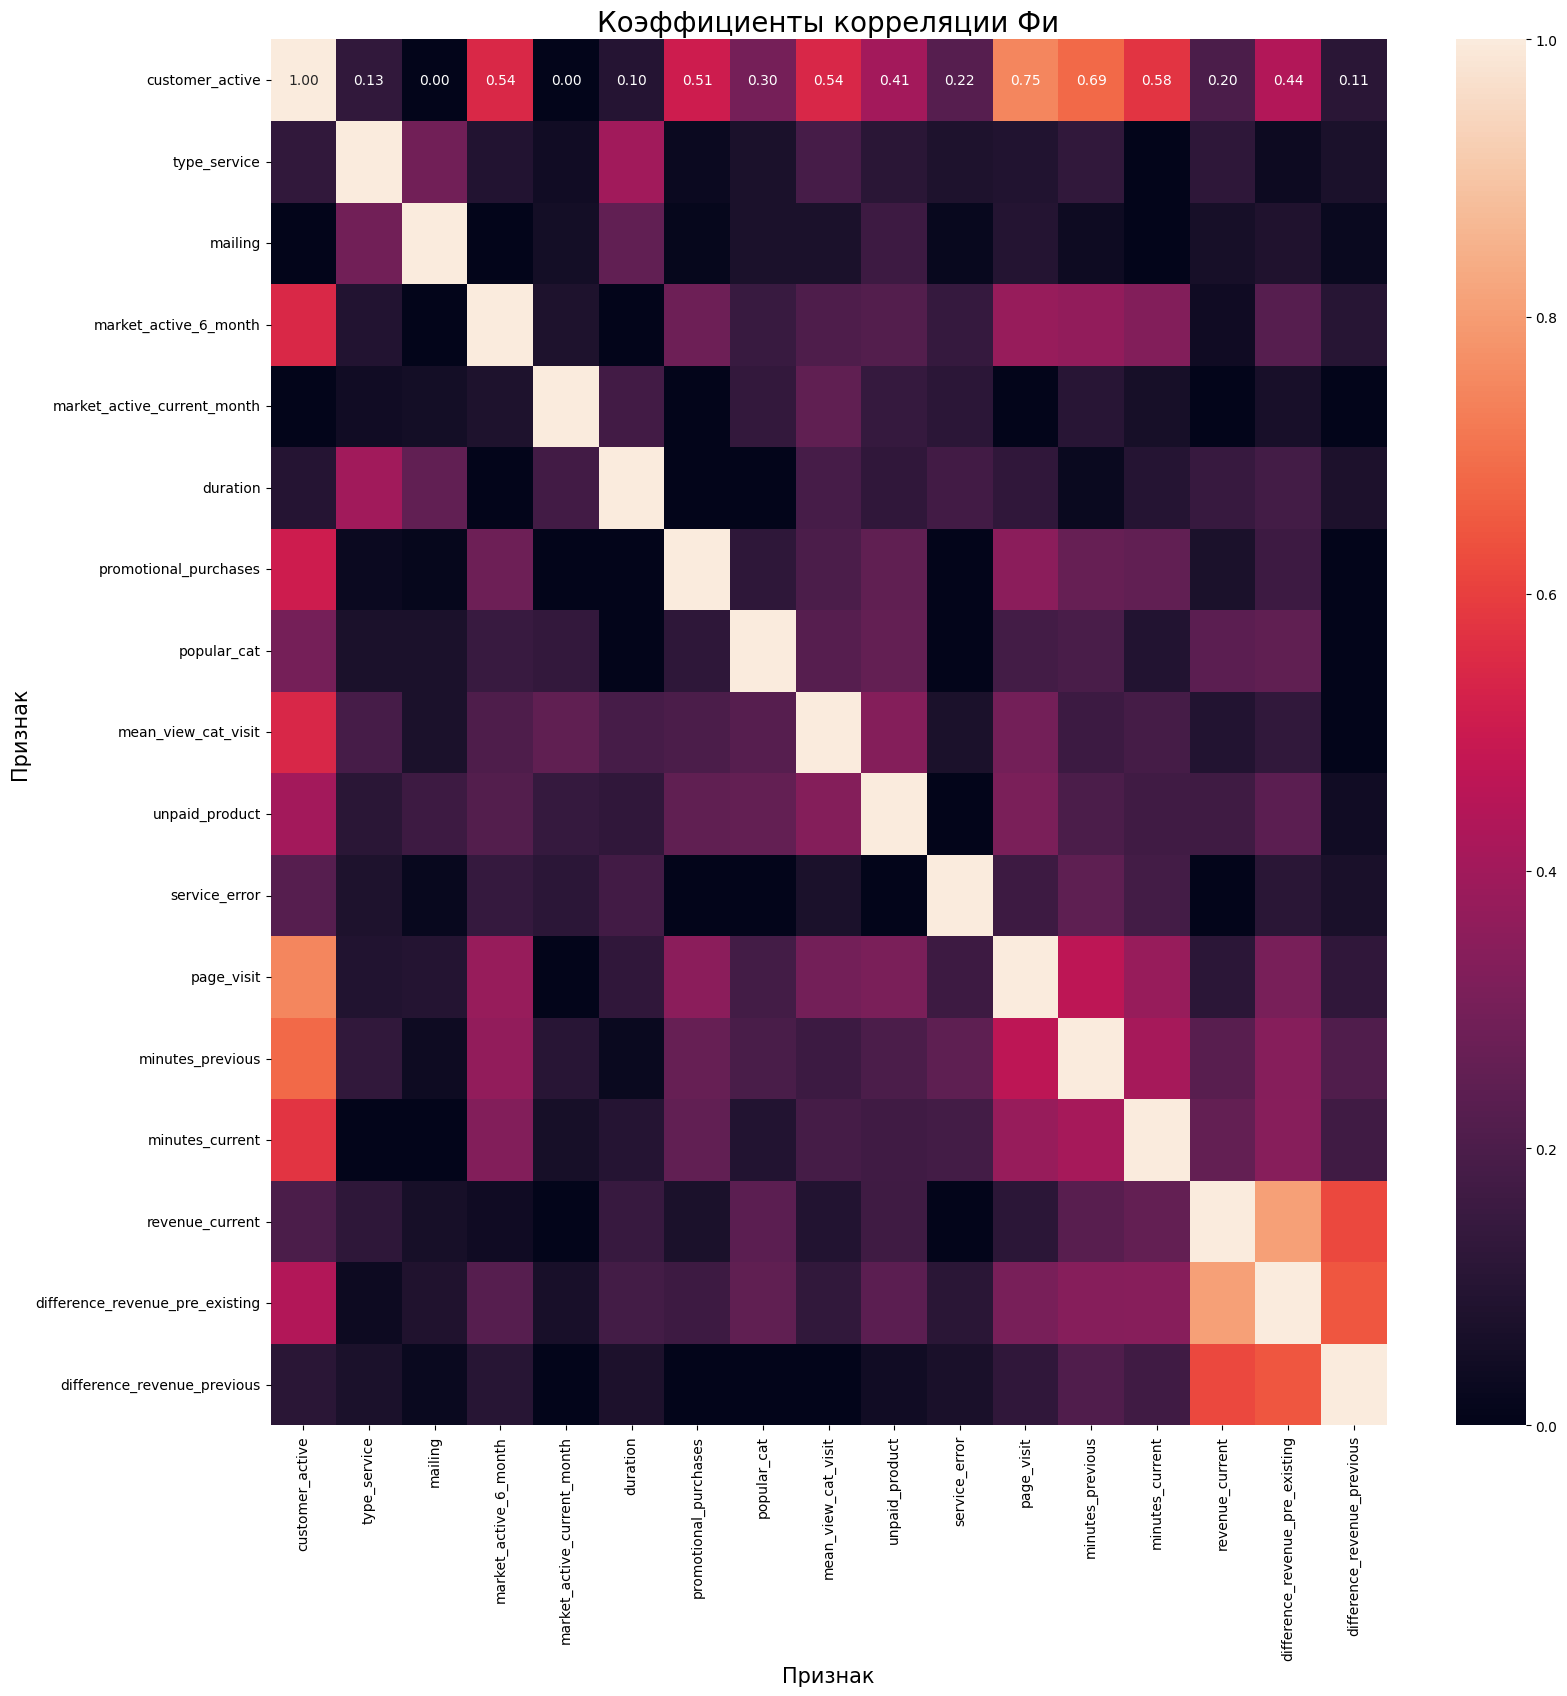

In [35]:
plt.subplots(figsize=(18, 18))
# тепловая карта коэффициентов корреляции Фи
sns.heatmap(market_file.drop('id', axis=1)
                .phik_matrix(interval_cols=['market_active_6_month',
                                            'duration',
                                            'promotional_purchases',
                                            'difference_revenue_pre_existing', 
                                            'difference_revenue_previous', 
                                            'revenue_current', 
                                            'minutes_previous', 
                                            'minutes_current']
                            ), 
            annot=True, 
            fmt=".2f")
plt.ylabel('Признак', fontsize=15)
plt.xlabel('Признак', fontsize=15)
plt.title('Коэффициенты корреляции Фи', fontsize=20)
plt.show()

По тепловой карте коэффициентов Фи видно, что:
- с целевым признаком `customer_active` имеют сильную корреляцию (коэффициент Фи больше 0,6) признаки:
    - `promotional_purchases`;
    - `page_visit`;
    - `minutes_previous` и `minutes_current`;
- немного меньше с целевым признаком коррелируют (коэффициент Фи больше 0,3) признаки:
    - `market_active_6_month`;
    - `popular_cat`;
    - `mean_veiw_cat_visit`;
    - `unpaid_product`;
    - `difference_revenue_pre_existing`;
- остальные признаки имеют очень слабую корреляцию либо вообще не коррелируют с целевым признаком;
- признаки `revenue_current`, `difference_revenue_pre_existing` и `difference_revenue_previous` достаточно сильно коррелируют между собой, но о мультиколлинеарности можно было бы говорить, если бы коэффициент был больше 0,9.

Посмотрим на диаграмму рассеяния количественных признаков в `market_file`:

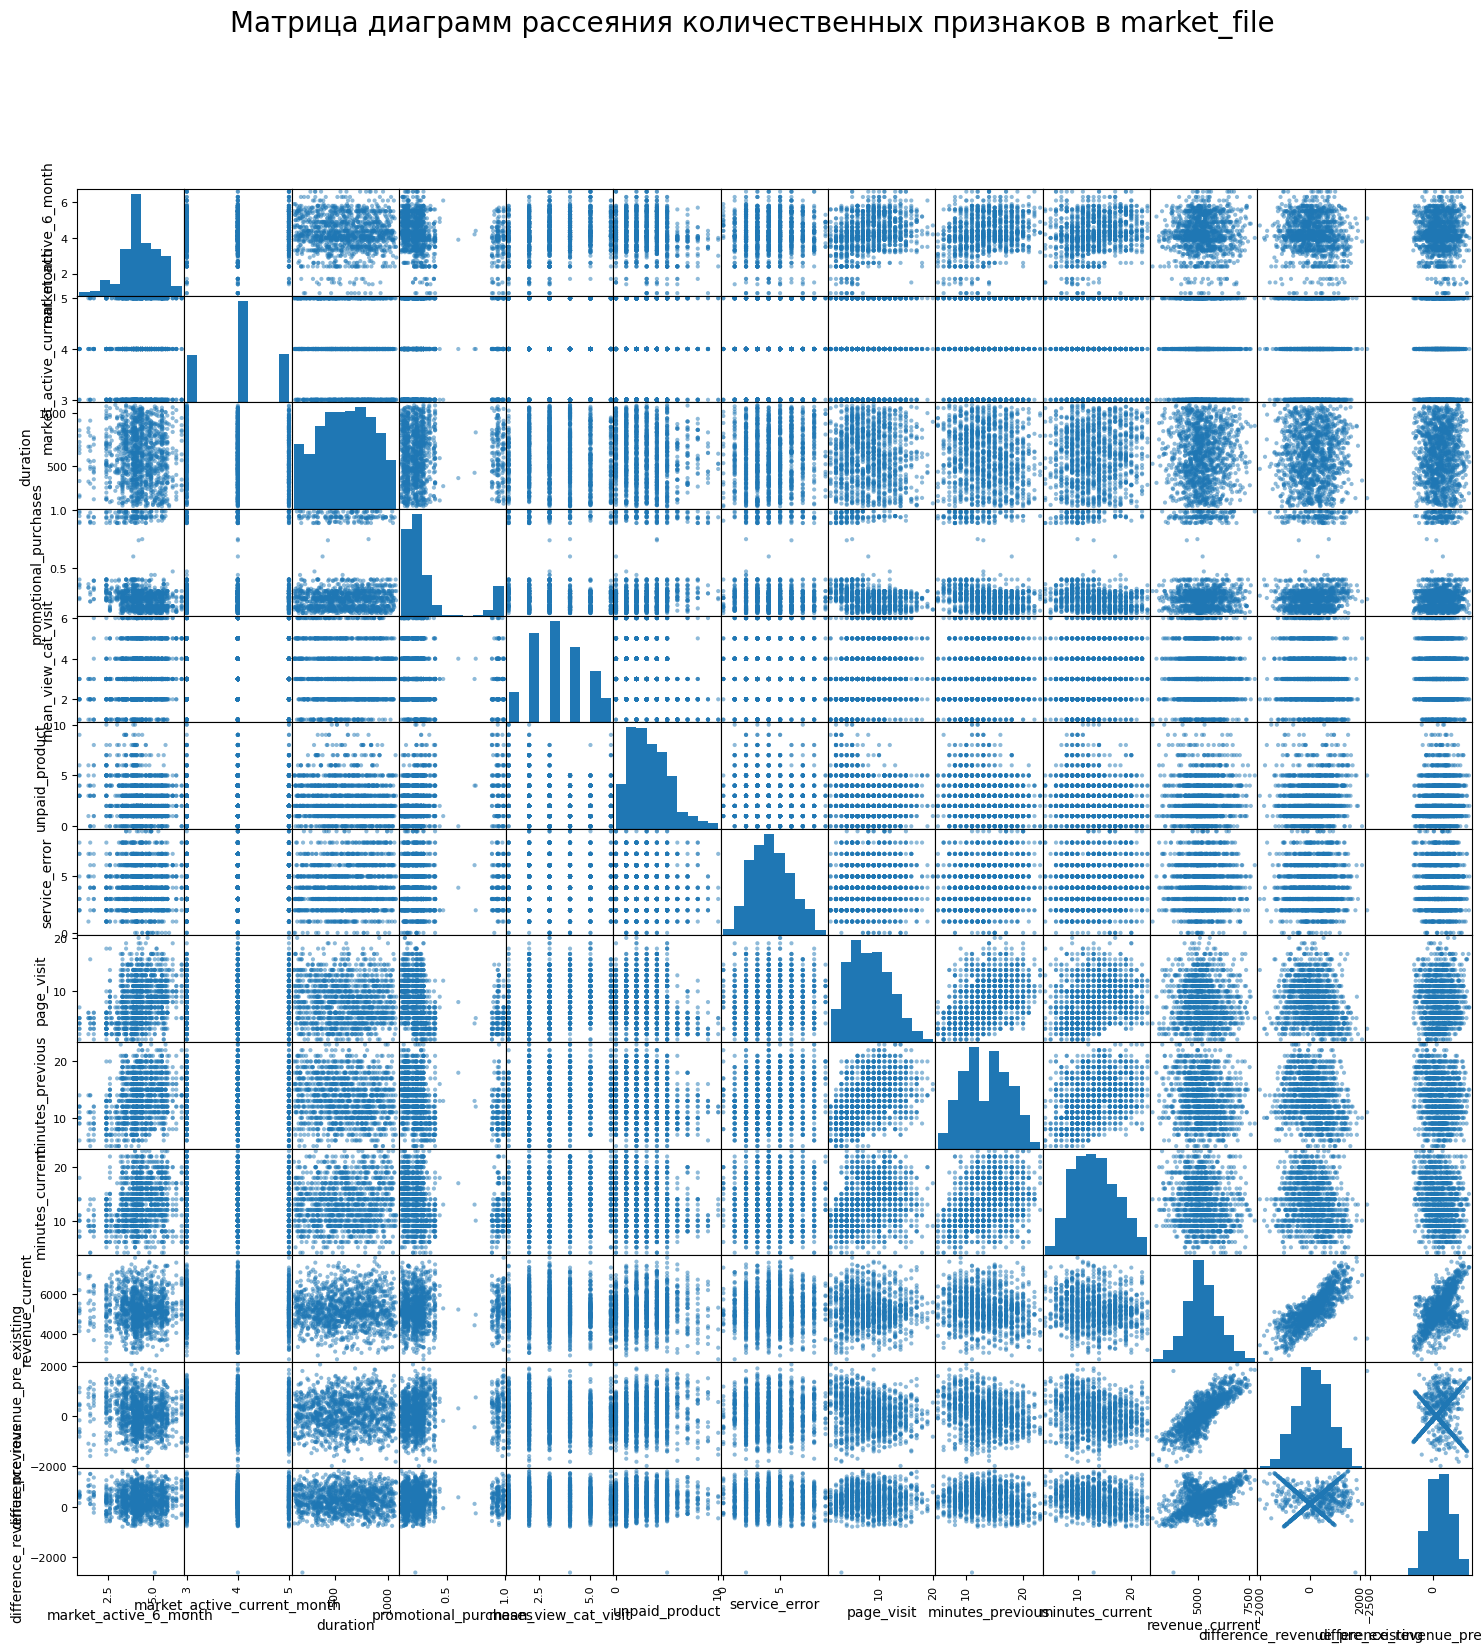

In [36]:
# матрица диаграмм рассеяния количественных признаков
pd.plotting.scatter_matrix(market_file.drop('id', axis=1), figsize=(18, 18))
plt.suptitle('Матрица диаграмм рассеяния количественных признаков в market_file', fontsize=20)
plt.show()

На диграммах рассеяния подтверждается то, что корреляция видна только у признаков `revenue_current` и `difference_revenue_pre_existing`, остальные признаки перемешаны.

### Вывод по блоку

Вывод по корреляционному анализу:
- с целевым признаком `customer_active` сильно коррелируют (коэффициент Фи больше 0,6) `promotional_purchases`, `page_visit`, `minutes_previous` и `minutes_current`;
- мультиколлинеарности признаков нет.

## Выбор модели

### Выбор лучшей модели с помощью пайплайнов

Выбирать модель будем с помощью пайплайнов, для начала создадим списки с названиями признаков (для кодирования и масштабирования):

In [37]:
# создаём списки с названиями признаков:
# для кодировщика OneHotEncoder
ohe_columns = ['mailing', 
               'popular_cat']

# для кодировщика OrdinalEncoder
ord_columns = ['type_service']

# для масштабирования
num_columns = ['market_active_6_month',
               'market_active_current_month',
               'duration', 
               'promotional_purchases', 
               'minutes_previous', 
               'minutes_current', 
               'revenue_current', 
               'difference_revenue_pre_existing',
               'difference_revenue_previous',
               'mean_view_cat_visit', 
               'unpaid_product', 
               'service_error', 
               'page_visit']

Дальше создадим пайплайны для кодирования признаков:

In [38]:
# создадим пайплайн для подготовки признаков из списка ohe_columns с OneHotEncoder:
ohe_pipe = Pipeline(
    [
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))]
    )

# создадим пайплайн для подготовки признаков из списка ord_columns с OrdinalEncoder: 
ord_pipe = Pipeline(
    [('ord', OrdinalEncoder(
                categories=[
                    ['премиум', 'стандарт']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
     )
    ]
)

Создадим пайплайн `data_preprocessor` для объединения закодированных и отмасштабированных данных:

In [39]:
# создадим общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Создадим итоговый пайплайн `pipe_final`, которы включает:
- пайплайн для подготовки данных `data_preprocessor`;
- модель:

In [40]:
# создадим итоговый пайплайн:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsClassifier())
])

Дальше создадим словарь с гиперпараметрами моделей, которые будем пробовать для предсказания покупательской активности:
- `KNeighborsClassifier()`:
    - будем изменять количество соседей `n_neighbors` от 3 до 53 с шагом 5;
- `DecisionTreeClassifier()`:
    - ограничим максилальную глубину дерева `max_depth` от 2 до 6;
    - ограничим число листьев от `max_features` 2 до 6;
- `LogisticRegression()`:
    - гиперпараметр регуляризации `С` от 1 до 5;
- `SVC()`:
    - вид ядра `kernel`: `linear`, `rbf`, `sigmoid`;
- для всех моделей переберем два варианта масштабирования: `StandardScaler`, `MinMaxScaler`:

In [41]:
param_grid = [
    # словарь для модели KNeighborsClassifier() 
    {
        'models':[ KNeighborsClassifier()], # модель
        'models__n_neighbors': range(3, 53, 5), # количество соседей от 3 до 50
        'preprocessor__num': [StandardScaler(), MinMaxScaler()] # два варианта масштабирования
    },
    
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=42)], # модель
        'models__max_depth': range(2, 6), # ограничение максимальной глубины дерева
        'models__max_features': range(2, 6), # ограничение числа листьев
        'preprocessor__num': [StandardScaler(), MinMaxScaler()] # два варианта масштабирования
    },
    
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=42, penalty='l2')], # модель
        'models__C': range(1, 5), # параметр С
        'preprocessor__num': [StandardScaler(), MinMaxScaler()] # два варианта масштабирования
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=42, probability=True)], # модель
        'models__kernel': ['linear', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()] # два варианта масштабирования
    }
]

Словари с гиперпараметрами готовы, теперь разделим `market_file` на тренировочную и тестовую выборки (в соотношении 1:4), не забывая об указании на дисбаланс целевого признака:

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    market_file.drop(['id','customer_active'], axis=1),
    market_file['customer_active'],
    test_size = 0.2, 
    random_state = 42,
    stratify = market_file['customer_active']
)

print(f'Размер тренировочной выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')

Размер тренировочной выборки: (1036, 16)
Размер тестовой выборки: (260, 16)


Выборки разделились корректно.

Все готово для выбора лучшей модели, в качестве метрики выбираем `roc_auc`, т.к. для задач бинарной классификации с дисбалансом классов она подходит больше всего:

In [43]:
# выбор лучшей модели с помощью GridSearchCV
grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# обучение лучшей модели на тренировочной выборке
grid_search.fit(X_train, y_train)

# получение рузультатов всех поделей
result = pd.DataFrame(grid_search.cv_results_)

# параметры лучшей модели
params_best_model = (result[['rank_test_score', 'params']]
                     .sort_values('rank_test_score')
                     .reset_index(drop=True)['params']
                     .loc[result.index[0]]
                    )

print('Лучшая модель и её параметры:\n\n', params_best_model)
print ('\n Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_.round(3))

Лучшая модель и её параметры:

 {'models': SVC(probability=True, random_state=42), 'models__kernel': 'rbf', 'preprocessor__num': StandardScaler()}

 Метрика лучшей модели на тренировочной выборке: 0.911


Лучшей моделью стала модель классификации опорных векторов `SVC` с ядром `rbf` и с масштабированием `StandardScaler`, и метрика `roc_auc` на тренировочной выборке составила 0.911, проверим эту модель на тестовой выборке: 

Метрика roc_auc на тестовой выборке:  0.903


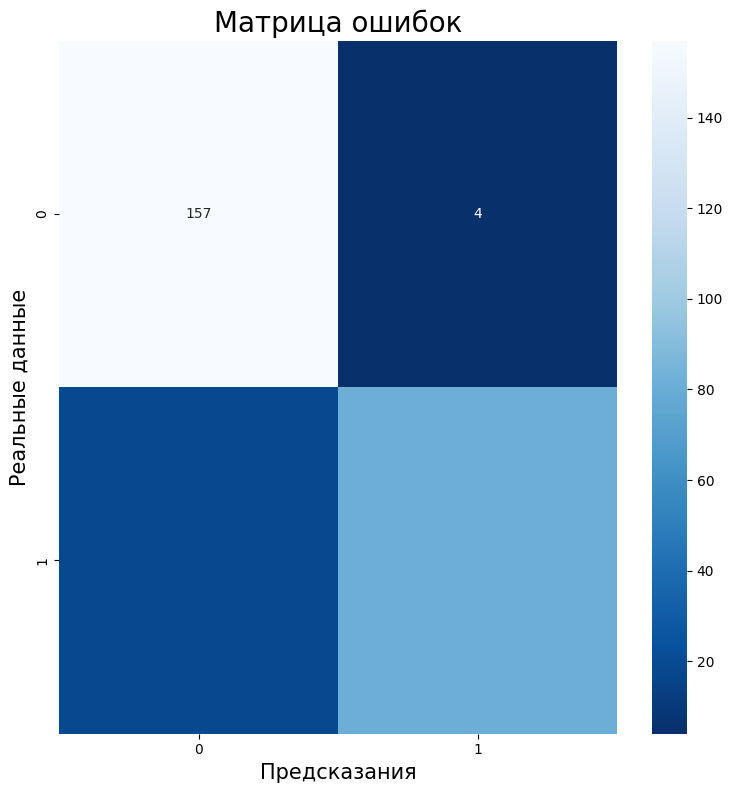

In [44]:
# сохранение лучшей модели в best_model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# вычисление метрику ROC-AUC
print('Метрика roc_auc на тестовой выборке: ', roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]).round(3))

# построение матрицы ошибок
fig, axes = plt.subplots(figsize=(9, 9))
sns.heatmap(confusion_matrix(y_test, best_model.predict(X_test)), annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Реальные данные',fontsize=15)
plt.xlabel('Предсказания',fontsize=15)
plt.title('Матрица ошибок',fontsize=20)
plt.show()

На тестовой выборке лучшая модель показала себя хорошо, метрика `roc_auc` равна 0,903, это хороший показатель, но много ложноотрицательных предсказаний (ошибка 2 рода).

### Вывод по блоку

Вывод по блоку выбора моделей:
- после перебора четырех моделей с различными гиперпараметрами оказалась модель классификации опорных векторов `SVC` с ядром `rbf` и с масштабированием `StandardScaler`;
- метрика `roc_auc` на тестовой выборке составила 0,903;
- много ошибок второго рода.

## Анализ важности признаков

### Анализ важности признаков с помощью shap-значений

Анализ важности признаков будем проводить с помощью библиотеки `shap`, но сначала получим закодированные и отмасштабированные данные тестовой выборки:

In [45]:
# получение закодированной и отмасштабированной тестовой выборки
data_preprocessor.fit(X_train)
X_test_final = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()
)

Для начала выведем график общей значимости признаков:

PermutationExplainer explainer: 261it [02:57,  1.41it/s]                                                               


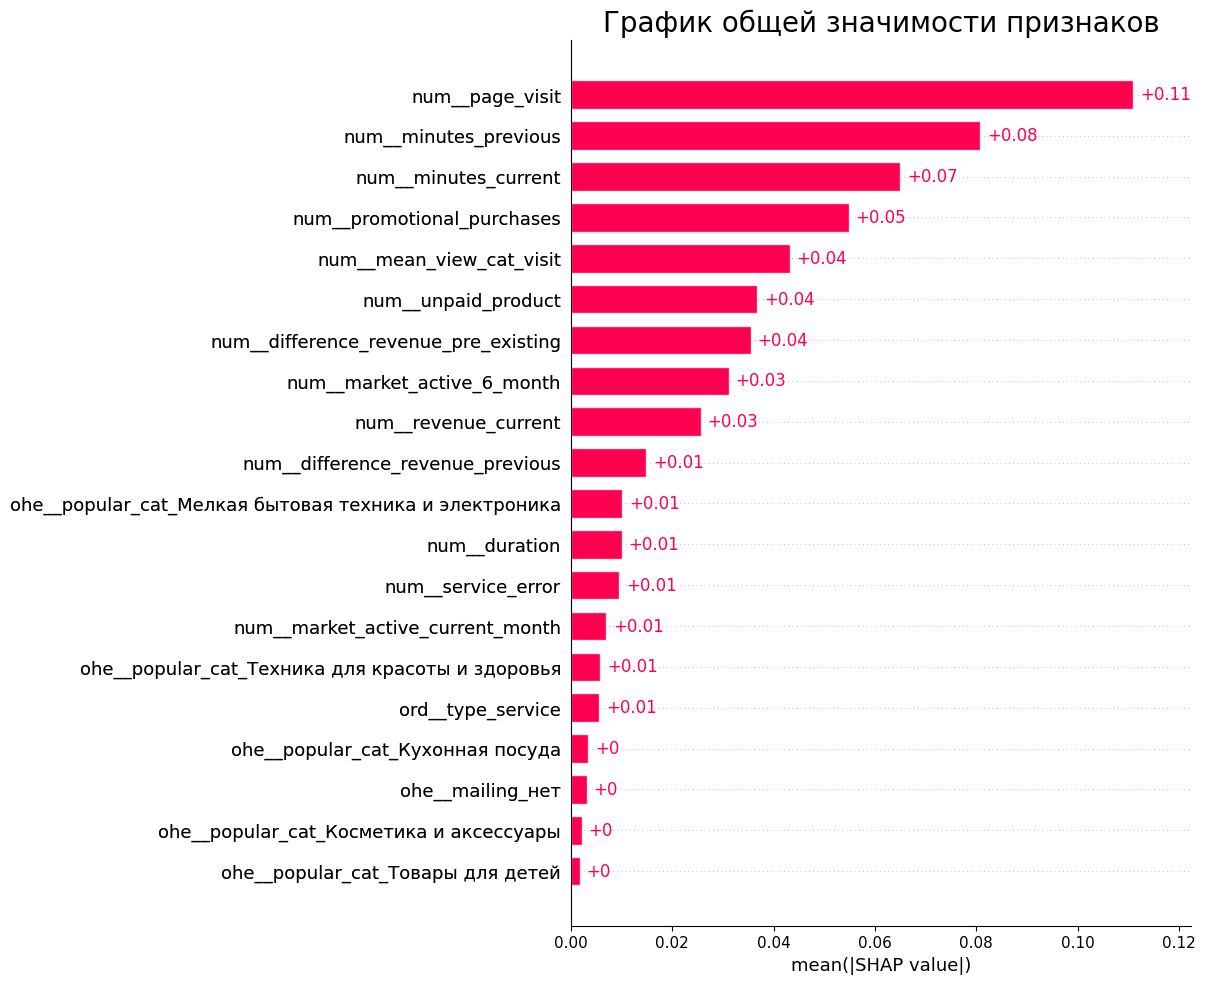

In [46]:
# идентификация модели
explainer = shap.Explainer(grid_search.best_estimator_.named_steps['models'].predict_proba, X_test_final)

# получение значений Шепли
shap_values = explainer(X_test_final)

# вывод графика общей значимости признаков
plt.title('График общей значимости признаков', fontsize=20)
shap.plots.bar(shap_values[:,:,1], max_display=21)

По графику видно, что:
- всех больше влияют на выбор класса признаки:
    - `page_visit` - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
    - `minutes_previous` - значение времени, проведённого на сайте за предыдущий месяц;
    - `minutes_current` - значение времени, проведённого на сайте за текцщий месяц;
- всех меньше влияют (практически не влияют):
    - `duration` количество дней с момента регистрации покупателя на сайте;
    - `service_error` число сбоев, которые коснулись покупателя во время посещения сайта;
    - `market_active_current_month` - количество маркетинговых коммуникаций в текущем месяце;
    - `type_service` -  уровень сервиса;
    - `mailing` - информация о том, можно ли присылать покупателю дополнительные предложения о товаре:;
    - `popular_cat` - самая популярная категория товаров у покупателя за последние 6 месяцев.
    
Посмотрим на диаграмму визуализации вклада признаков в каждое предсказание модели:

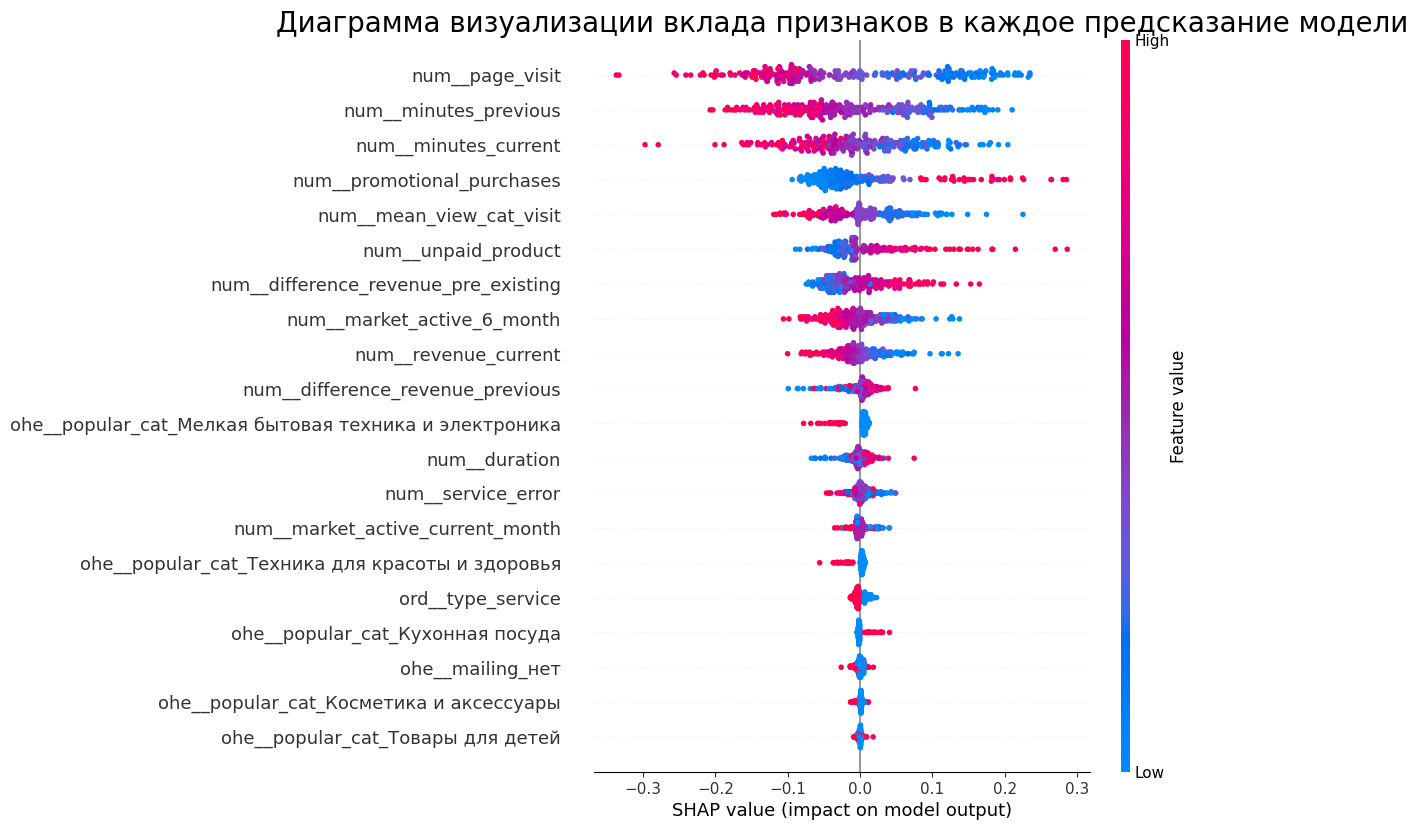

In [47]:
# вывод диаграммы визуализации вклада признаков в каждое предсказание модели
plt.title('Диаграмма визуализации вклада признаков в каждое предсказание модели', fontsize=20)
shap.plots.beeswarm(shap_values[:,:,1], max_display=21)

По диаграмме видно, что:
- вероятность принадлежности к классу 0 (Прежняя активность) тем больше, чем больше значения признаков:
    - `page_visit` - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
    - `minutes_previous` - значение времени, проведённого на сайте за предыдущий месяц;
    - `minutes_current` - значение времени, проведённого на сайте за текцщий месяц;
    - `mean_view_cat_visit` - количество категорий, которые покупатель просмотрел за визит в течение последнего месяца;
    - `market_active_6_month` - среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев;
    - `revenue_current` - выручка за текущий месяц;
- вероятность принадлежности к классу 1 (Снизилась) тем больше, чем больше значения признаков:
    - `promotional_purchses` - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
    - `difference_revenue_pre_existing` разность между выручкой предыдущего и предпредыдущено месяца;
    - `unpaid_product` - общее число неоплаченных товаров в корзине за последние 3 месяца.
    
Теперь посмотрим на несколько примеров визуализации индивидуальных SHAP-значений каждого наблюдения в датасете (возьмем по два значения из ложноположительных и ложноотрицательных предсказаний):

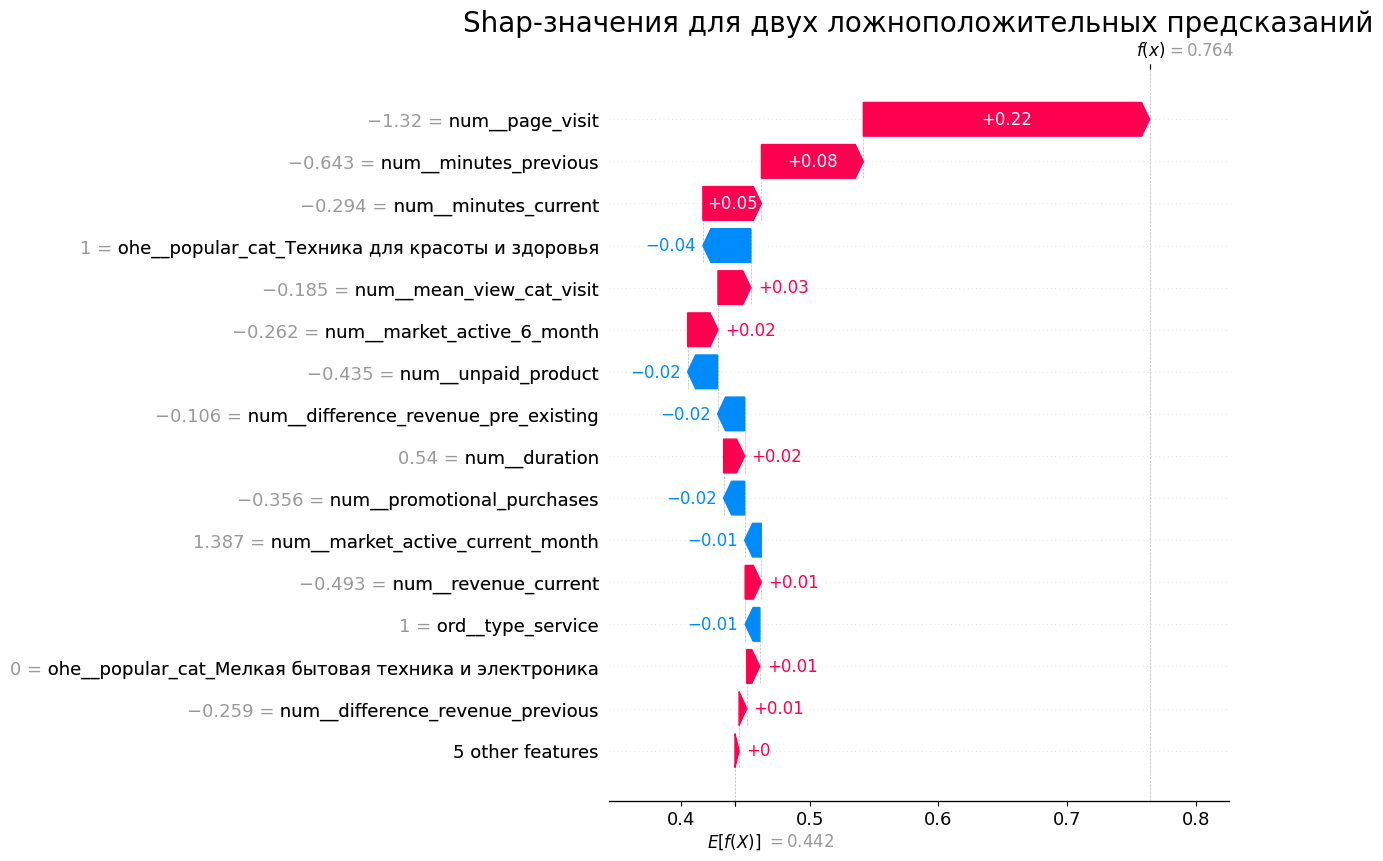

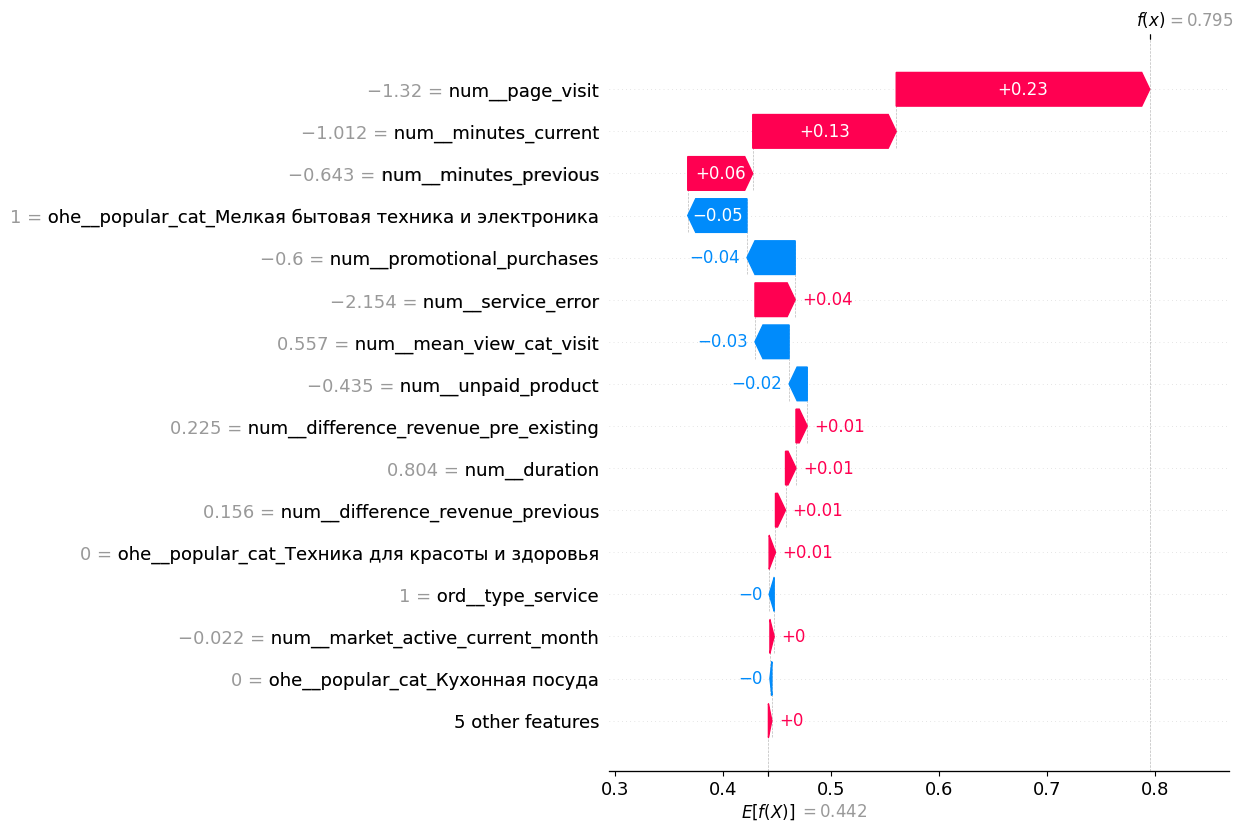

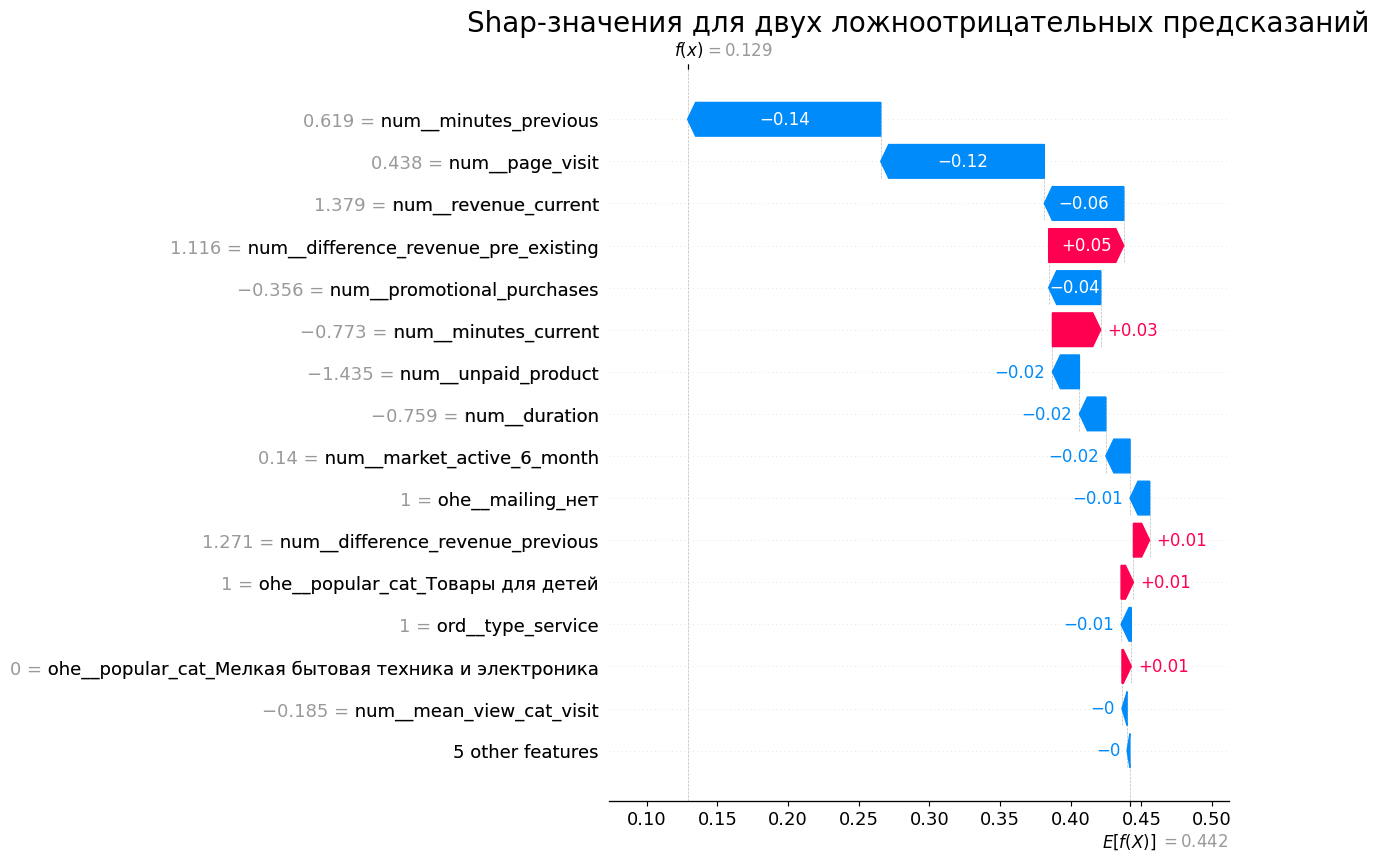

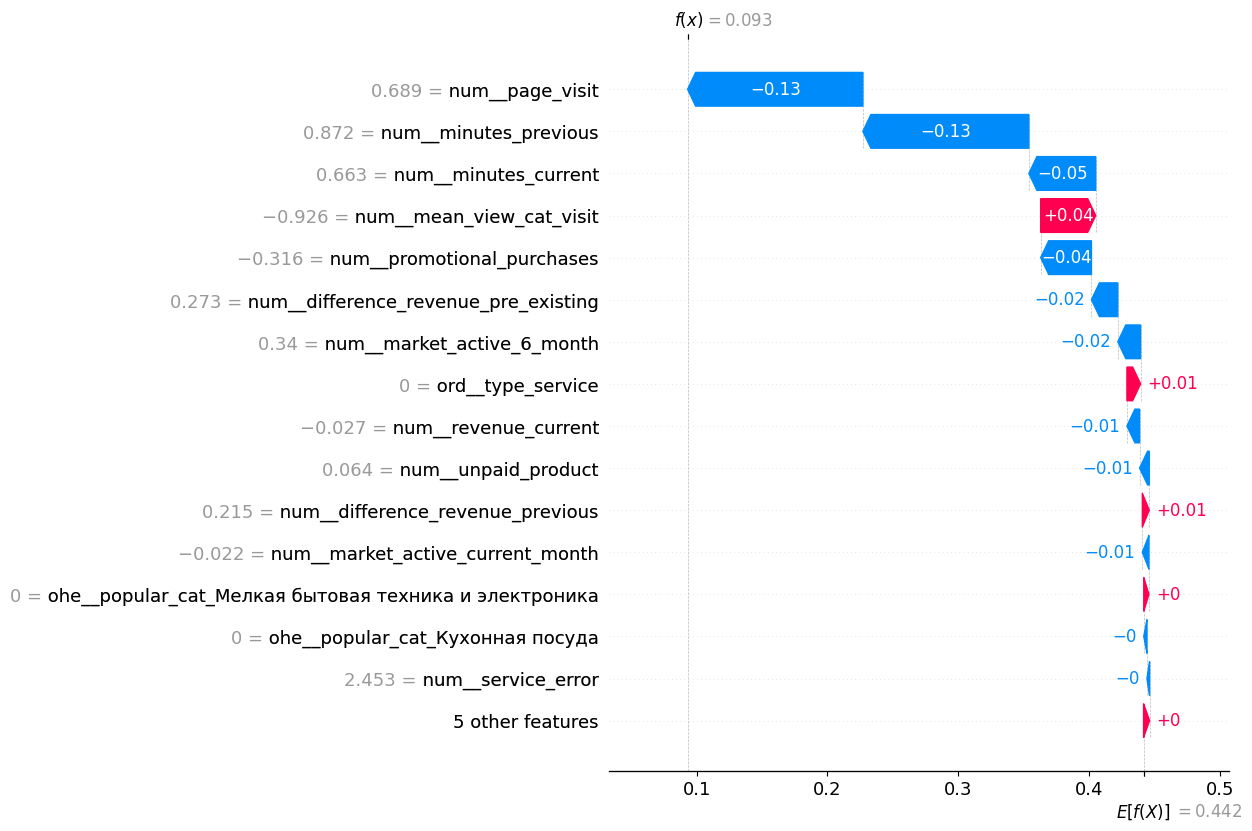

In [48]:
# получение предсказаний, создание единого датафрейма вместе с y_test
pred = pd.DataFrame(best_model.predict(X_test))
y_test_and_preds = pd.DataFrame(y_test).reset_index(drop=True)
y_test_and_preds['pred'] = pred

# влияние признаков в ложноположительных предсказаниях
plt.title('Shap-значения для двух ложноположительных предсказаний', fontsize=20)
for i in y_test_and_preds.query('customer_active == "Прежний уровень" & pred == "Снизилась"').index[0:2]:
    (shap.waterfall_plot(shap_values[i,:,1], max_display=16))

# влияние признаков в ложноотрицательных предсказаниях
plt.title('Shap-значения для двух ложноотрицательных предсказаний', fontsize=20)
for i in y_test_and_preds.query('customer_active == "Снизилась" & pred == "Прежний уровень"').index[0:2]:
    (shap.waterfall_plot(shap_values[i,:,1], max_display=16))

По визуализации видно, что:
- низкое значение `page_visit` и `minutes_current` склонило предсказание к ложноположительному результату;
- наоборот высокие значения `page_visit` и `minutes_previous` склонило предсказание к ложноотрицательному результату.

### Вывод по блоку

Вывод по блоку анализа важности признаков:
- всех больше влияют на выбор класса признаки (причем чем больше эти признаки, тем больше вероятность, что активность останется на `Прежнем уровне`):
    - `page_visit` - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
    - `minutes_previous` - значение времени, проведённого на сайте за предыдущий месяц;
    - `minutes_current` - значение времени, проведённого на сайте за текцщий месяц;
- но иногда значения этих признаков путают модель;
- всех меньше влияют (практически не влияют) на выбор класса признаки:
    - `duration` количество дней с момента регистрации покупателя на сайте;
    - `market_active_current_month` - количество маркетинговых коммуникаций в текущем месяце;
    - `type_service` - уровень сервиса;
    - `mailing` - информация о том, можно ли присылать покупателю дополнительные предложения о товаре;
- исходя из того, какие признаки сильно влияют на покупательскую активность, необходимо как-то увеличивать время проведенное на сайте и количеством страниц, просматриваемым покупателем, например, можно:
    - увеличить разнообразие товаров;
    - увеличить количество и качество рекомендуемых товаров.

## Сегментация покупателей

Добавим к датафрейму данные о прибыльности магазинов от покупателей `income` из `money`:

In [49]:
# добавление данных о прибыльности от покупателей
market_file = market_file.merge(money, on='id', how='left')
print('Количество пропусков в столбце "income": ', market_file['income'].isna().sum())

Количество пропусков в столбце "income":  0


Пропусков нет.

Добавим столбец `predict_proba`, который содержит вероятность принадлежности к классу 1 (покупательская активность: `Снизилась`) и сделаем из него еще один столбец `customer_active_prob`, где будет две категории `Высокая` (`predict_proba` > 0,5) и `Низкая` (`predict_proba` < 0,5):

In [50]:
# добавление столбца predict_proba
market_file['predict_proba'] = best_model.predict_proba(market_file.drop(['id', 'customer_active', 'income'], axis=1))[:,1]
print('Количество пропусков в столбце "predict_proba": ', market_file['predict_proba'].isna().sum())

# добавление столбца customer_active_prob
market_file['customer_active_prob'] = np.where(market_file['predict_proba'] > 0.5, 'Высокая', 'Низкая')
print('Количество пропусков в столбце "customer_active_prob": ', market_file['customer_active_prob'].isna().sum())

Количество пропусков в столбце "predict_proba":  0
Количество пропусков в столбце "customer_active_prob":  0


Пропусков нет, данные добавились корректно.

### Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности

Выделим группу клиентов с максимальной долей покупок по акции (`promotional_purchases` больше 0,8):

In [51]:
# срез покупателей с высокой долей покупок по акции
cat_1 = market_file.query('promotional_purchases > 0.8').reset_index(drop=True)

Теперь посмотрим на гистограммы распределения топ-8 признаков, влияющих на покупательскую активность (исключим признак `difference_revenue_pre_existing`, т.к. это разница выручки за предпрдыдущий и предыдущий месяц, на который не получится повлиять, заменим его на признак прибыль `income` для понимания прибыльного ли клиента теряет платформа), с разбивкой на группы с высокой и низкой вероятностью снижения покупательской активности (со средним значением признака):

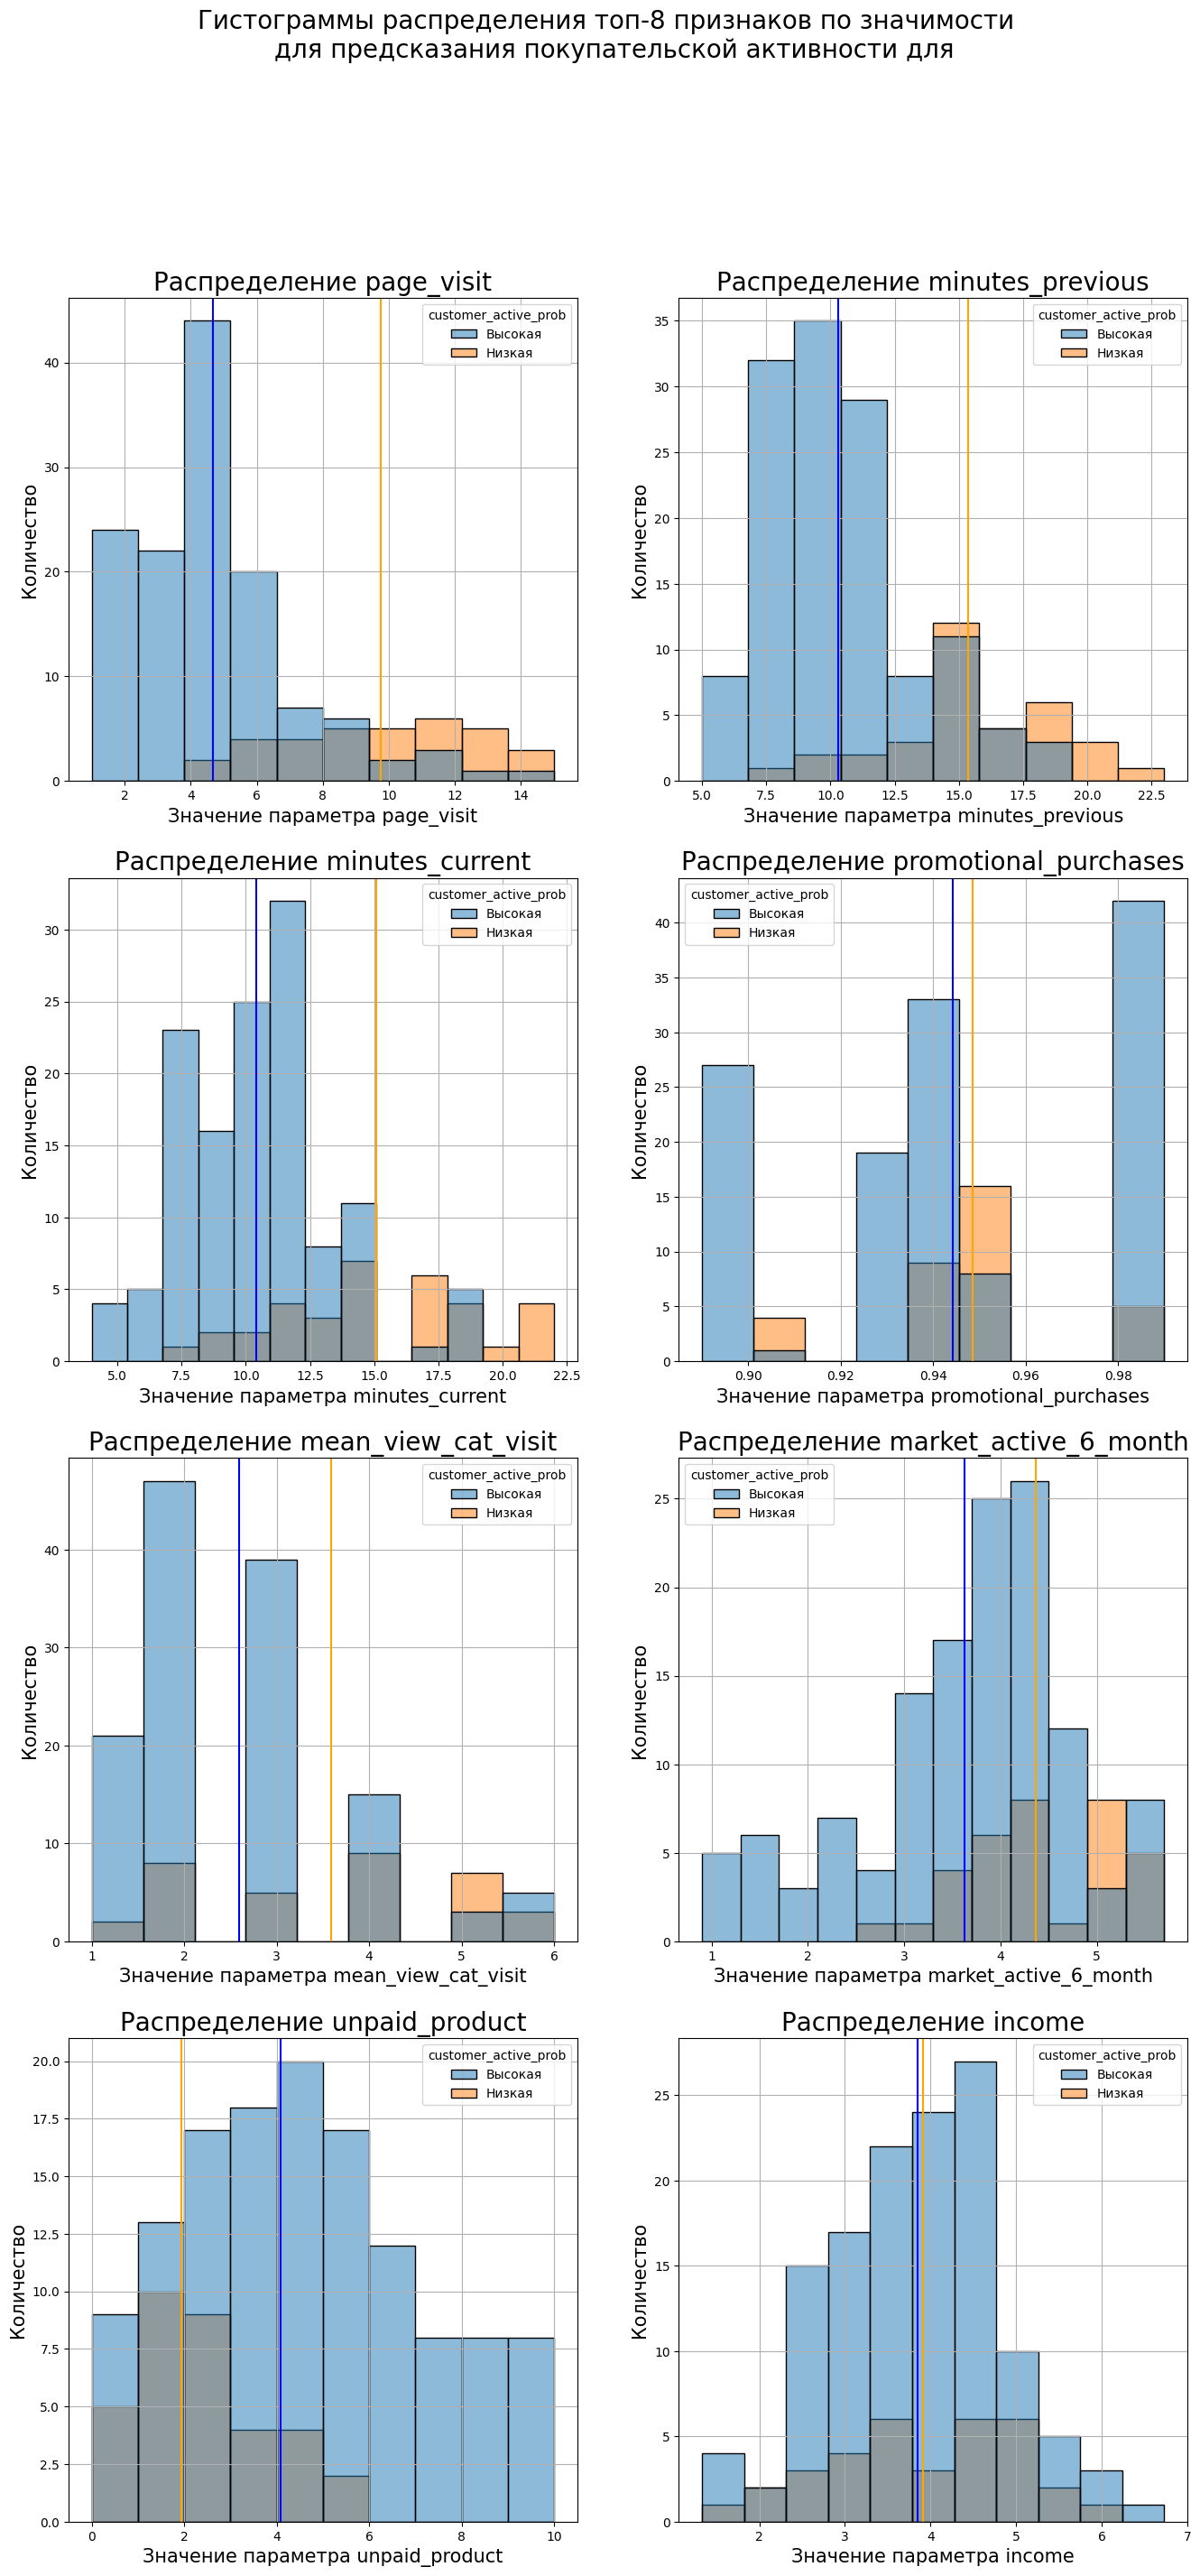

In [52]:
# функция для построения гистограмм с разбивкой по 
def draw_hist(df, parameter):
    # создаем сетку для гистограмм
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 32))
    
    # название сетки
    plt.suptitle('Гистограммы распределения топ-8 признаков по значимости \n для предсказания покупательской активности для'
                 , fontsize=20)
    
    # перебираем координаты сетки для гистограмм и строим гистограммы признаков с разбивкой по покупательской активности
    for i in range(4):
        for j in range(2):
            sns.histplot(df, x=parameter[i*2+j], hue='customer_active_prob', ax=axes[i, j])
            axes[i,j].set_title(f'Распределение {parameter[i*2+j]}', fontsize=20)
            axes[i,j].set_ylabel(f'Количество', fontsize=15)
            axes[i,j].set_xlabel(f'Значение параметра {parameter[i*2+j]}', fontsize=15)
            axes[i,j].grid()
            axes[i,j].axvline(df.query('customer_active_prob == "Высокая"')[parameter[i*2+j]].mean(), color='blue')
            axes[i,j].axvline(df.query('customer_active_prob == "Низкая"')[parameter[i*2+j]].mean(), color='orange')

# создание списка топ-8 признаков
top_8  = ['page_visit',
          'minutes_previous',
          'minutes_current',
          'promotional_purchases',
          'mean_view_cat_visit',
          'market_active_6_month',
          'unpaid_product',
          'income']
                
# вывод гистограмм
draw_hist(cat_1, top_8)

По гистограммам видно, что:
- среднее количество страниц просматриваемых покупателями `page_visit` с высокой вероятностью сижения покупательской активности меньше на 5, а это самый влиятельный признак;
- время проведенного на сайте за предыдущий `minutes_previous` и текущий месяц `minutes_current` у покупателей с высокой вероятностью сижения покупательской активности меньше;
- среднее количество просматриваемых категорий за визит `mean_view_cat_visit` тоже у покупателей с высокой вероятностью сижения покупательской активности меньше;
- среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев `market_active_6_month` у покупателей с высокой вероятностью сижения покупательской активности меньше;
- количество неоплаченных товаров в корзине `unpaid_product` у покупателей с высокой вероятностью сижения покупательской активности больше;
- доход от покупателей с высокой и низкой вероятностью сижения покупательской активности одинаковый.


Рекомендации для повышения уровня покупательской активности у клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности 
- общая рекомендация для первых трех выводов: необходимо больше показывать подобных товаров из той же категории со скидкой, а также рекомендуемых товаров из других категорий (например при просмотре фена из категории `Техника для красоты и здоровья` предлагать также средства для ухода за волосами из категории `Косметика и аксессуары`, чтобы покупатели посещали больше страниц и разных категорий, а за одно и проводили больше времени на сайте;
- рекомендация для увеличения `market_active_6_month`: увеличить число рассылок, звонков, показов рекламы и прочего для покупателей этой категории;

### Группа клиентов с наиболее высокой прибыльностью и высокой вероятностью снижения покупательской активности

Выделим группу клиентов с наиболее высокой прибыльностью (`income` больше среднего значения `income`):

In [53]:
# срез покупателей с высокой прибыльностью
cat_2 = market_file.query('income > income.mean()').reset_index(drop=True)

Посмотрим на гистограммы распределения:

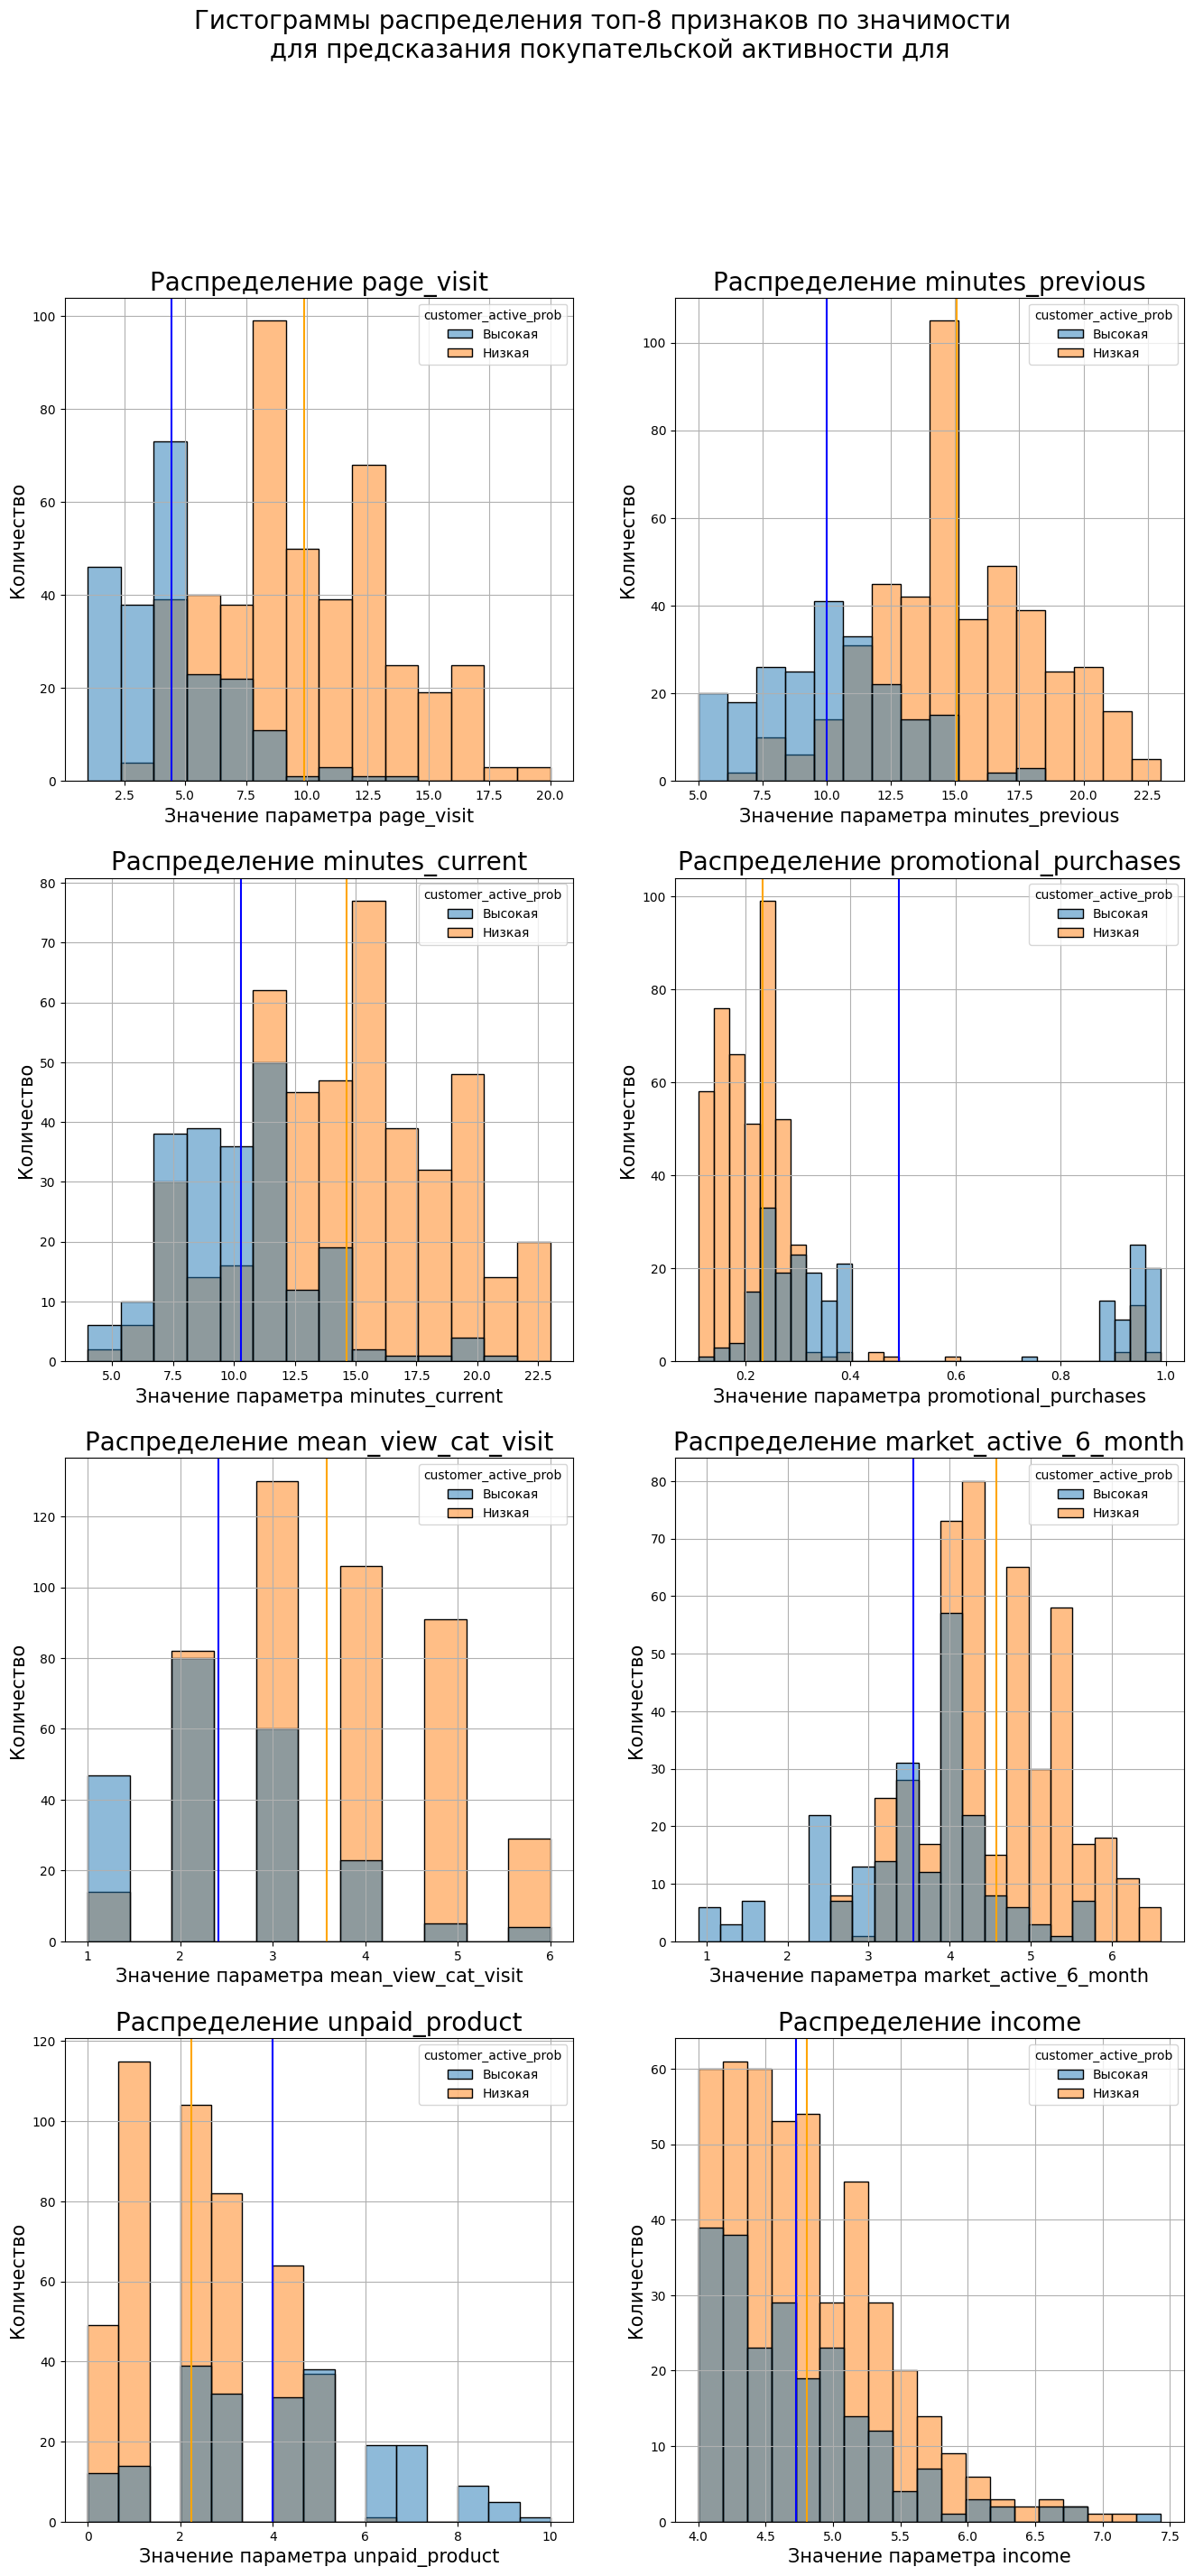

In [54]:
# вывод гистограмм
draw_hist(cat_2, top_8)

По гистограммам видно, что:
- ситуация аналогичная группе клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности, соответственно и рекомендации такие же.


### Группа клиентов с типом сервиса "премиум"

Выделим группу клиентов с типом сервиса `type_service` "премиум":

In [55]:
# срез покупателей с типом сервиса "премиум"
cat_3 = market_file.query('type_service == "премиум"').reset_index(drop=True)

Посмотрим на гистограммы

In [ ]:
# вывод гистограмм
draw_hist(cat_3, top_8)

Ситуация аналогичная двум предыдущим группам.

## Общий вывод

В проекте "Обучение с учителем: качество модели" проделана работа по изучению данных и их предобработке, а именно были:
- переименованы названия столбцов;
- заменены некорректные записи (ошибки в написании) категориальных данных;
- данные прошли проверку на дубликаты.

Затем был проведен исследовательский анлиз и выявлено, что:
- в данных о выручке в `market_money` есть выброс и нулевые значения;
- данные о прибыли, времени, проведенного на сайте, среджнего количества страниц, просмотренных на сайте, чмсло сбоев во время посешения сайта и среднее количество категорий, просмотренных покупателем за визит сайта распределены нормально;
- есть дисбаланс целевого признака.

Далее данные были объединены:
- с помощью функции были добавлены новые столбцы с выручкой и временем на сайте;
- с помощью этих столбцов были получены признаки, описывающие финансовое поведение покупателей;
- убраны покупатели у которых не было активности за какой-либо месяц за последний квартал, которые были выявлены в исследовательском анализе.

При корреляционном анализе было выявлено, что:
- с целевым признаком `customer_active` сильно коррелируют (коэффициент Фи больше 0,6) `promotional_purchases`, `page_visit`, `minutes_previous` и `minutes_current`;
- мультиколлинеарности признаков нет.

Затем с помощью `Pipeline` и `GridSearchCV` была определена лучшая модель для предсказания покупательской активности `customer_active` и её оказалась:
- модель классификации опорных векторов `SVC` с ядром `rbf` и с масштабированием `StandardScaler`;
- метрика `roc_auc` на тестовой выборке составила 0,903.

Далее была произведена интерпритация модели с помощью Shap-значений и выявлено что:
- всех больше влияют на выбор класса признаки (причем чем больше эти признаки, тем больше вероятность, что активность останется на `Прежнем уровне`):
    - `page_visit` - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
    - `minutes_previous` - значение времени, проведённого на сайте за предыдущий месяц;
    - `minutes_current` - значение времени, проведённого на сайте за текцщий месяц;
- всех меньше влияют (практически не влияют) на выбор класса признаки:
    - `duration` количество дней с момента регистрации покупателя на сайте;
    - `service_error` число сбоев, которые коснулись покупателя во время посещения сайта;
    - `market_active_current_month` - количество маркетинговых коммуникаций в текущем месяце;
    - `type_service` -  уровень сервиса;
    - `mailing` - информация о том, можно ли присылать покупателю дополнительные предложения о товаре:;
    - `popular_cat` - самая популярная категория товаров у покупателя за последние 6 месяцев.

Потом были проанализированы три категории покупателей:
- группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности;
- группа клиентов с наиболее высокой прибыльностью и высокой вероятностью снижения покупательской активности;
- группа клиентов с типом сервиса "премиум";

и для них были рекомендованы следующие предложения для повышения покупательской активности:
- необходимо больше показывать подобных товаров из той же категории со скидкой (для 1 группы и без скидки для 2 и 3 группы), а также рекомендуемых товаров из других категорий (например при просмотре фена из категории `Техника для красоты и здоровья` предлагать также средства для ухода за волосами из категории `Косметика и аксессуары`, чтобы покупатели посещали больше страниц и разных категорий, а за одно и проводили больше времени на сайте;
- необходимо увеличить число рассылок, звонков, показов рекламы и прочего для покупателей этих категорий.